# COMPER-V5 - EXPERIMENT RESULTS REPORT
## This notebook presents the analysis of the similar transitions sets identified over the agent´s training runs on each game.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [19]:
def read_full_game_set():
    df_single= pd.DataFrame()
    df_staked = pd.DataFrame()
    games = ['v5-asterix','v5-asteroids', 'v5-battle_zone','v5-beam_rider','v5-freeway','v5-seaquest','v5-space_invaders','v5-video_pinball']
    for game in games:
        aux = pd.read_json('simcount/single_frames/'+game+'/progress.json',lines=True)
        aux['Game'] = game.replace('v5-',"").replace('_'," ").capitalize()
        aux["FramesMode"] = 'single'
        df_single = df_single.append(aux)

        aux = pd.read_json('simcount/staked_frames/'+game+'/progress.json',lines=True)
        aux['Game'] = game.replace('v5-',"").replace('_'," ").capitalize()
        aux["FramesMode"] = 'staked'
        df_staked =df_staked.append(aux)
    df_single = df_single[df_single['st_count']>1]
    df_staked = df_staked[df_staked['st_count']>1]
    return df_single,df_staked



def read_game(game,framesmode):
    df = pd.DataFrame()
    df= pd.read_json('simcount/'+framesmode+'/'+game+'/progress.json',lines=True)
    df["Game"]=game
    df["FramesMode"] = framesmode
    df = df[df['st_count']>1]
    return df

def pivot_max_sum(df,level="st_key"):
    if(level=="st_key"):        
        df = pd.pivot_table(df,index=['Game','ep','st_key'],values=['st_count'],aggfunc=np.max)
        df = pd.pivot_table(df,index=['Game','ep','st_key'],values=['st_count'],aggfunc=np.sum)
    else:
        df = pd.pivot_table(df,index=['Game','ep'],values=['st_count'],aggfunc=np.max)
        df = pd.pivot_table(df,index=['Game','ep'],values=['st_count'],aggfunc=np.sum)
    return df

def pivot_updates_by_stkey(df):
    df = pd.pivot_table(df,index=['Game','log_count','ep'],values=['st_count'],aggfunc=np.sum)
    return df
        
def get_game_data(game,level="st_key"):
    df_single = read_game(game,"single_frames")
    df_single =  pivot_max_sum(df_single,level)
    df_staked = read_game(game,"staked_frames")
    df_staked =  pivot_max_sum(df_staked,level)
    return df_single,df_staked

class Plotter(object):
    def __init__(self):        
        self.xlabel = "Number of Episodes"
        self.ylabel = "Size of Transitions Sets"
    def counts(self,df,h=20,w=20,orient="v",title="Single Frames",dpi=150):
        fig,axes = plt.subplots(2)        
        fig.set_dpi(dpi)               
        fig.set_figheight(h)
        fig.set_figwidth(w)
        g = sns.boxplot(data=df.reset_index(),x="ep",y='st_count',whis=1.5,ax=axes[0],orient=orient)        
        g.set(title=title)
        g.set_xlabel(self.xlabel)
        g.set_ylabel(self.ylabel)

        g =sns.scatterplot(data=df.reset_index(),x="ep",y="st_count",hue='st_key',ax=axes[1])
        g.set_xlabel(self.xlabel)
        g.set_ylabel(self.ylabel)


    def counts2(self,df,h=20,w=20,orient="v",title="",dpi=150):
        fig,axes = plt.subplots(1)        
        fig.set_dpi(dpi)               
        fig.set_figheight(h)
        fig.set_figwidth(w)
        g = sns.boxplot(data=df.reset_index(),x="ep",y='st_count',whis=1.5,orient=orient)        
        if(title!=""): g.set(title=title)
        g.set_xlabel(self.xlabel)
        g.set_ylabel(self.ylabel)        
    
    def displot(self,df,title):
        fig = plt.figure()
        fig.set_dpi(150)
        g =sns.displot(df_temp, x="ep", y="st_count", hue="Game")
        g.set(xlabel=self.xlabel, ylabel=self.ylabel)
        g.set(title=title)       

plotter = Plotter()

## ASTERIX

In [4]:
df_single,df_stacked = get_game_data("v5-asterix")

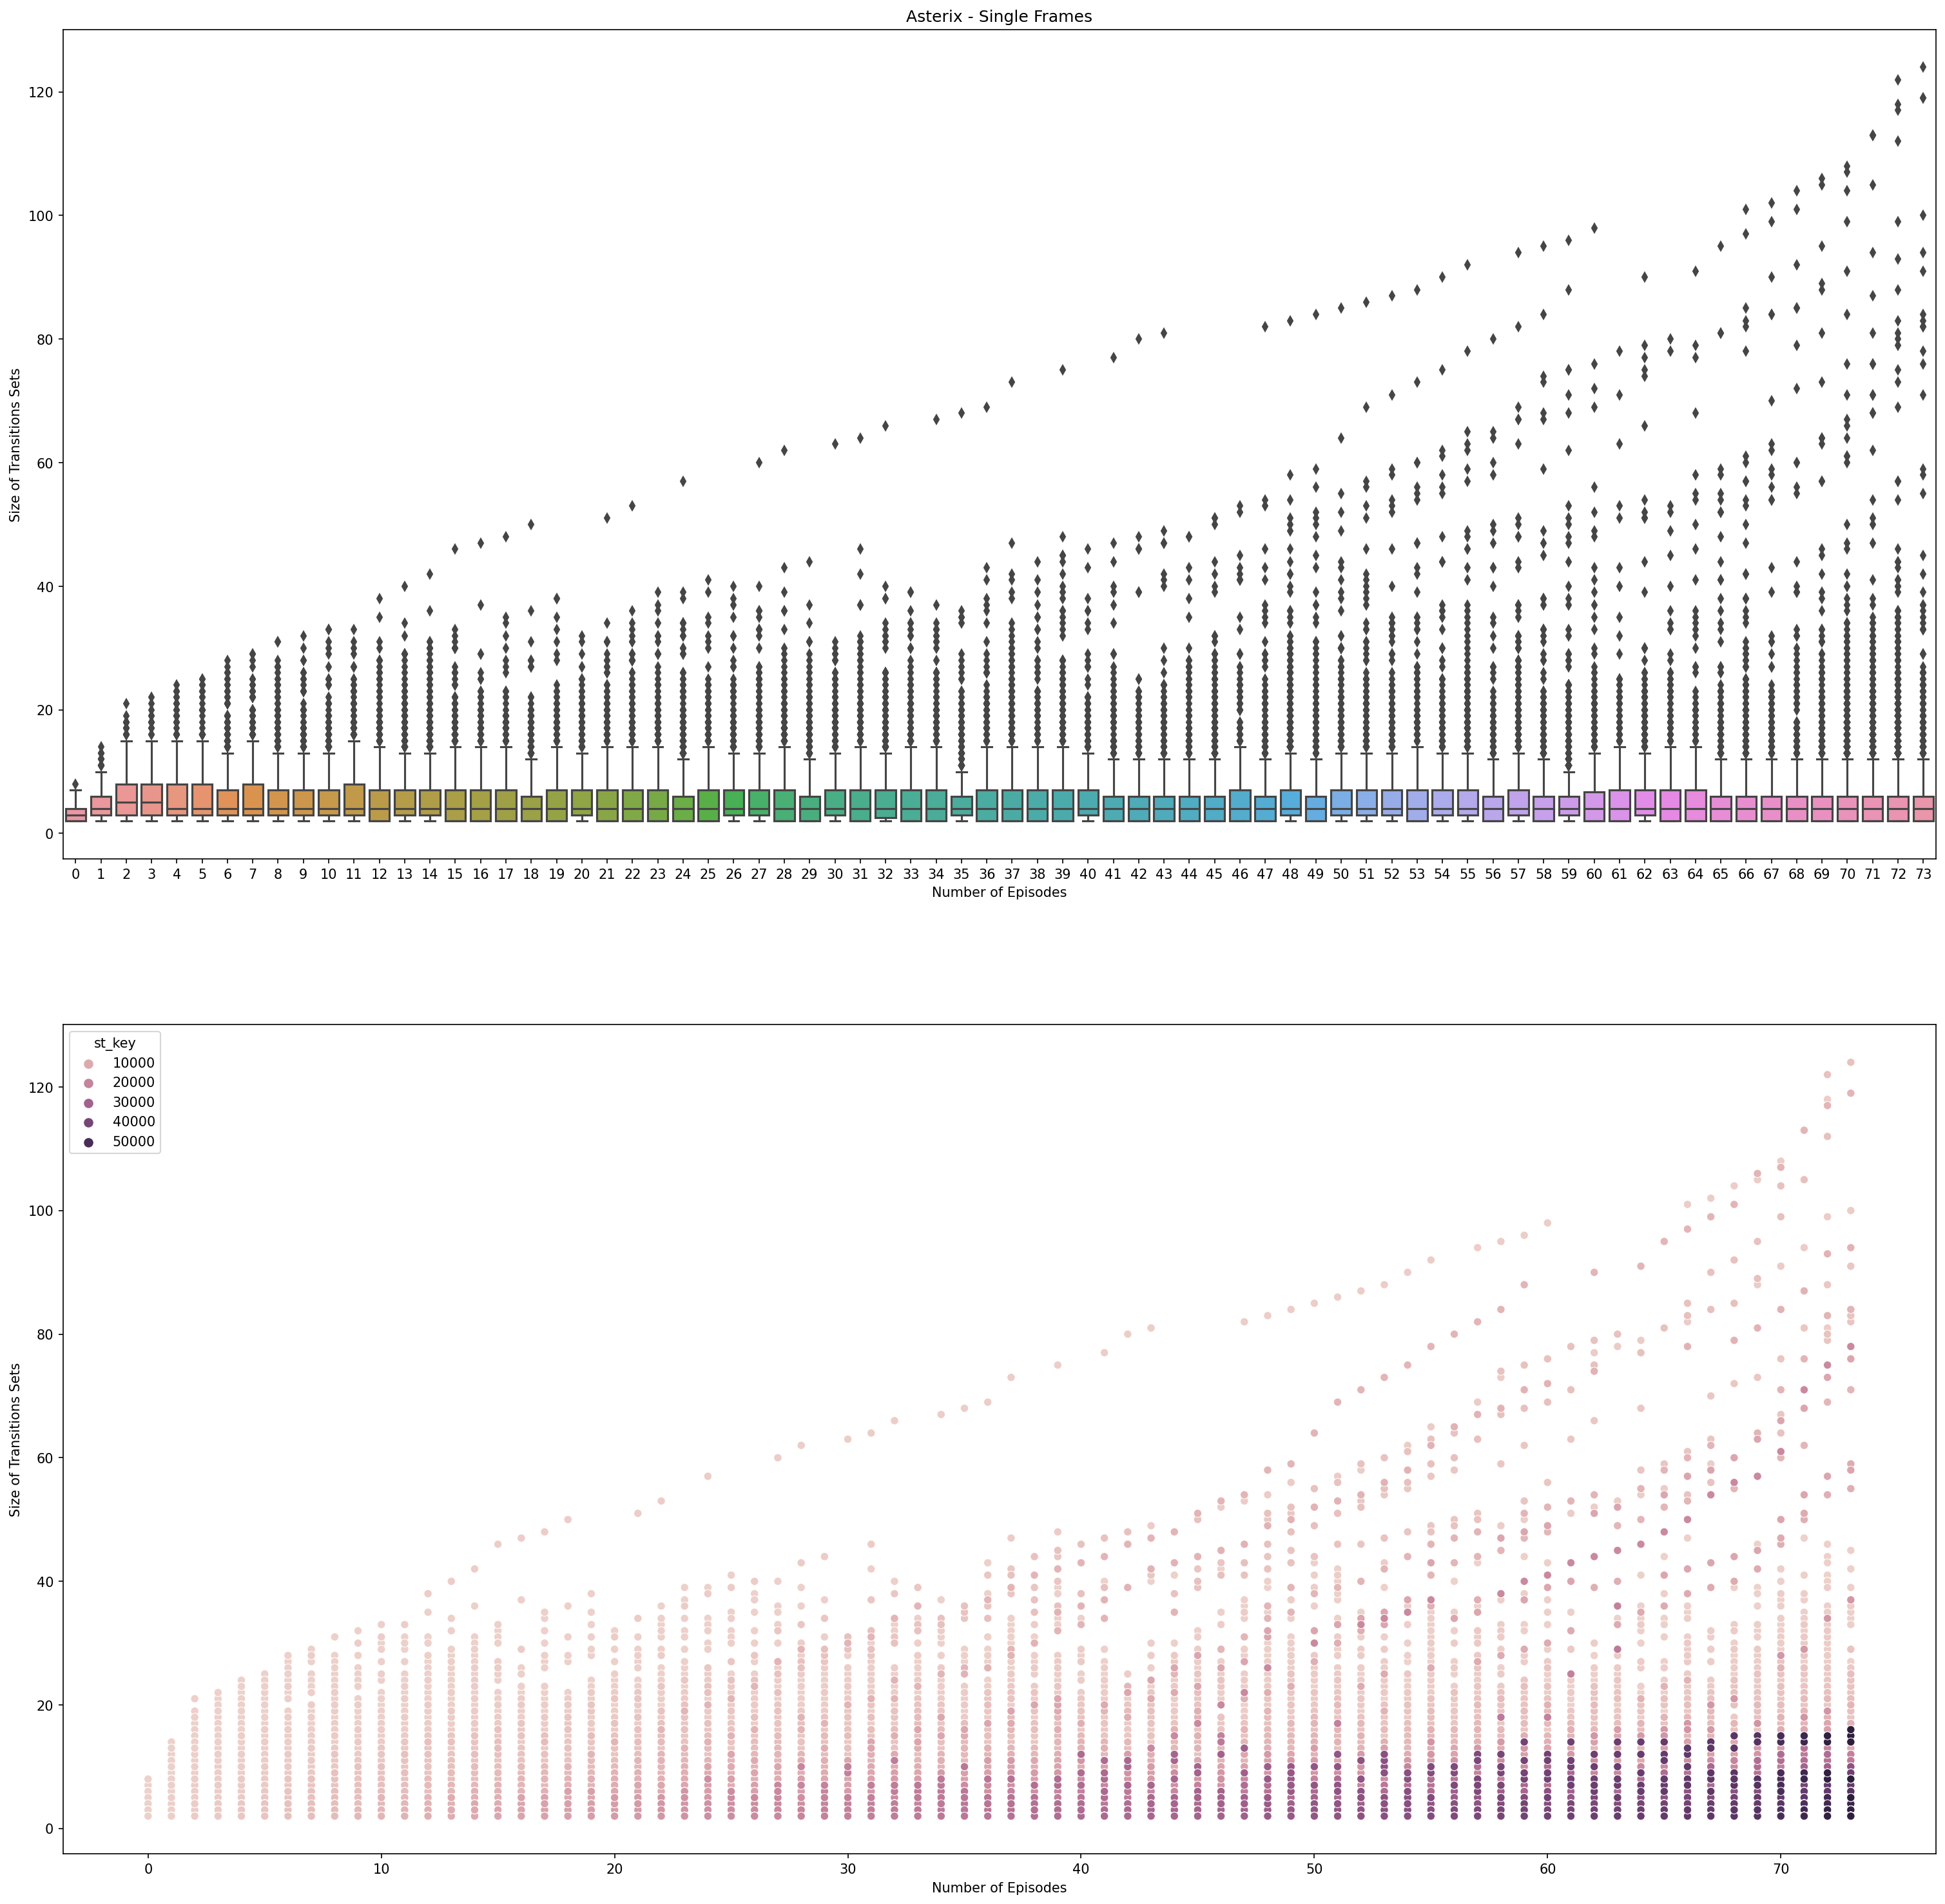

In [5]:

plotter.counts(df=df_single,h=25,w=25,title="Asterix - Single Frames")

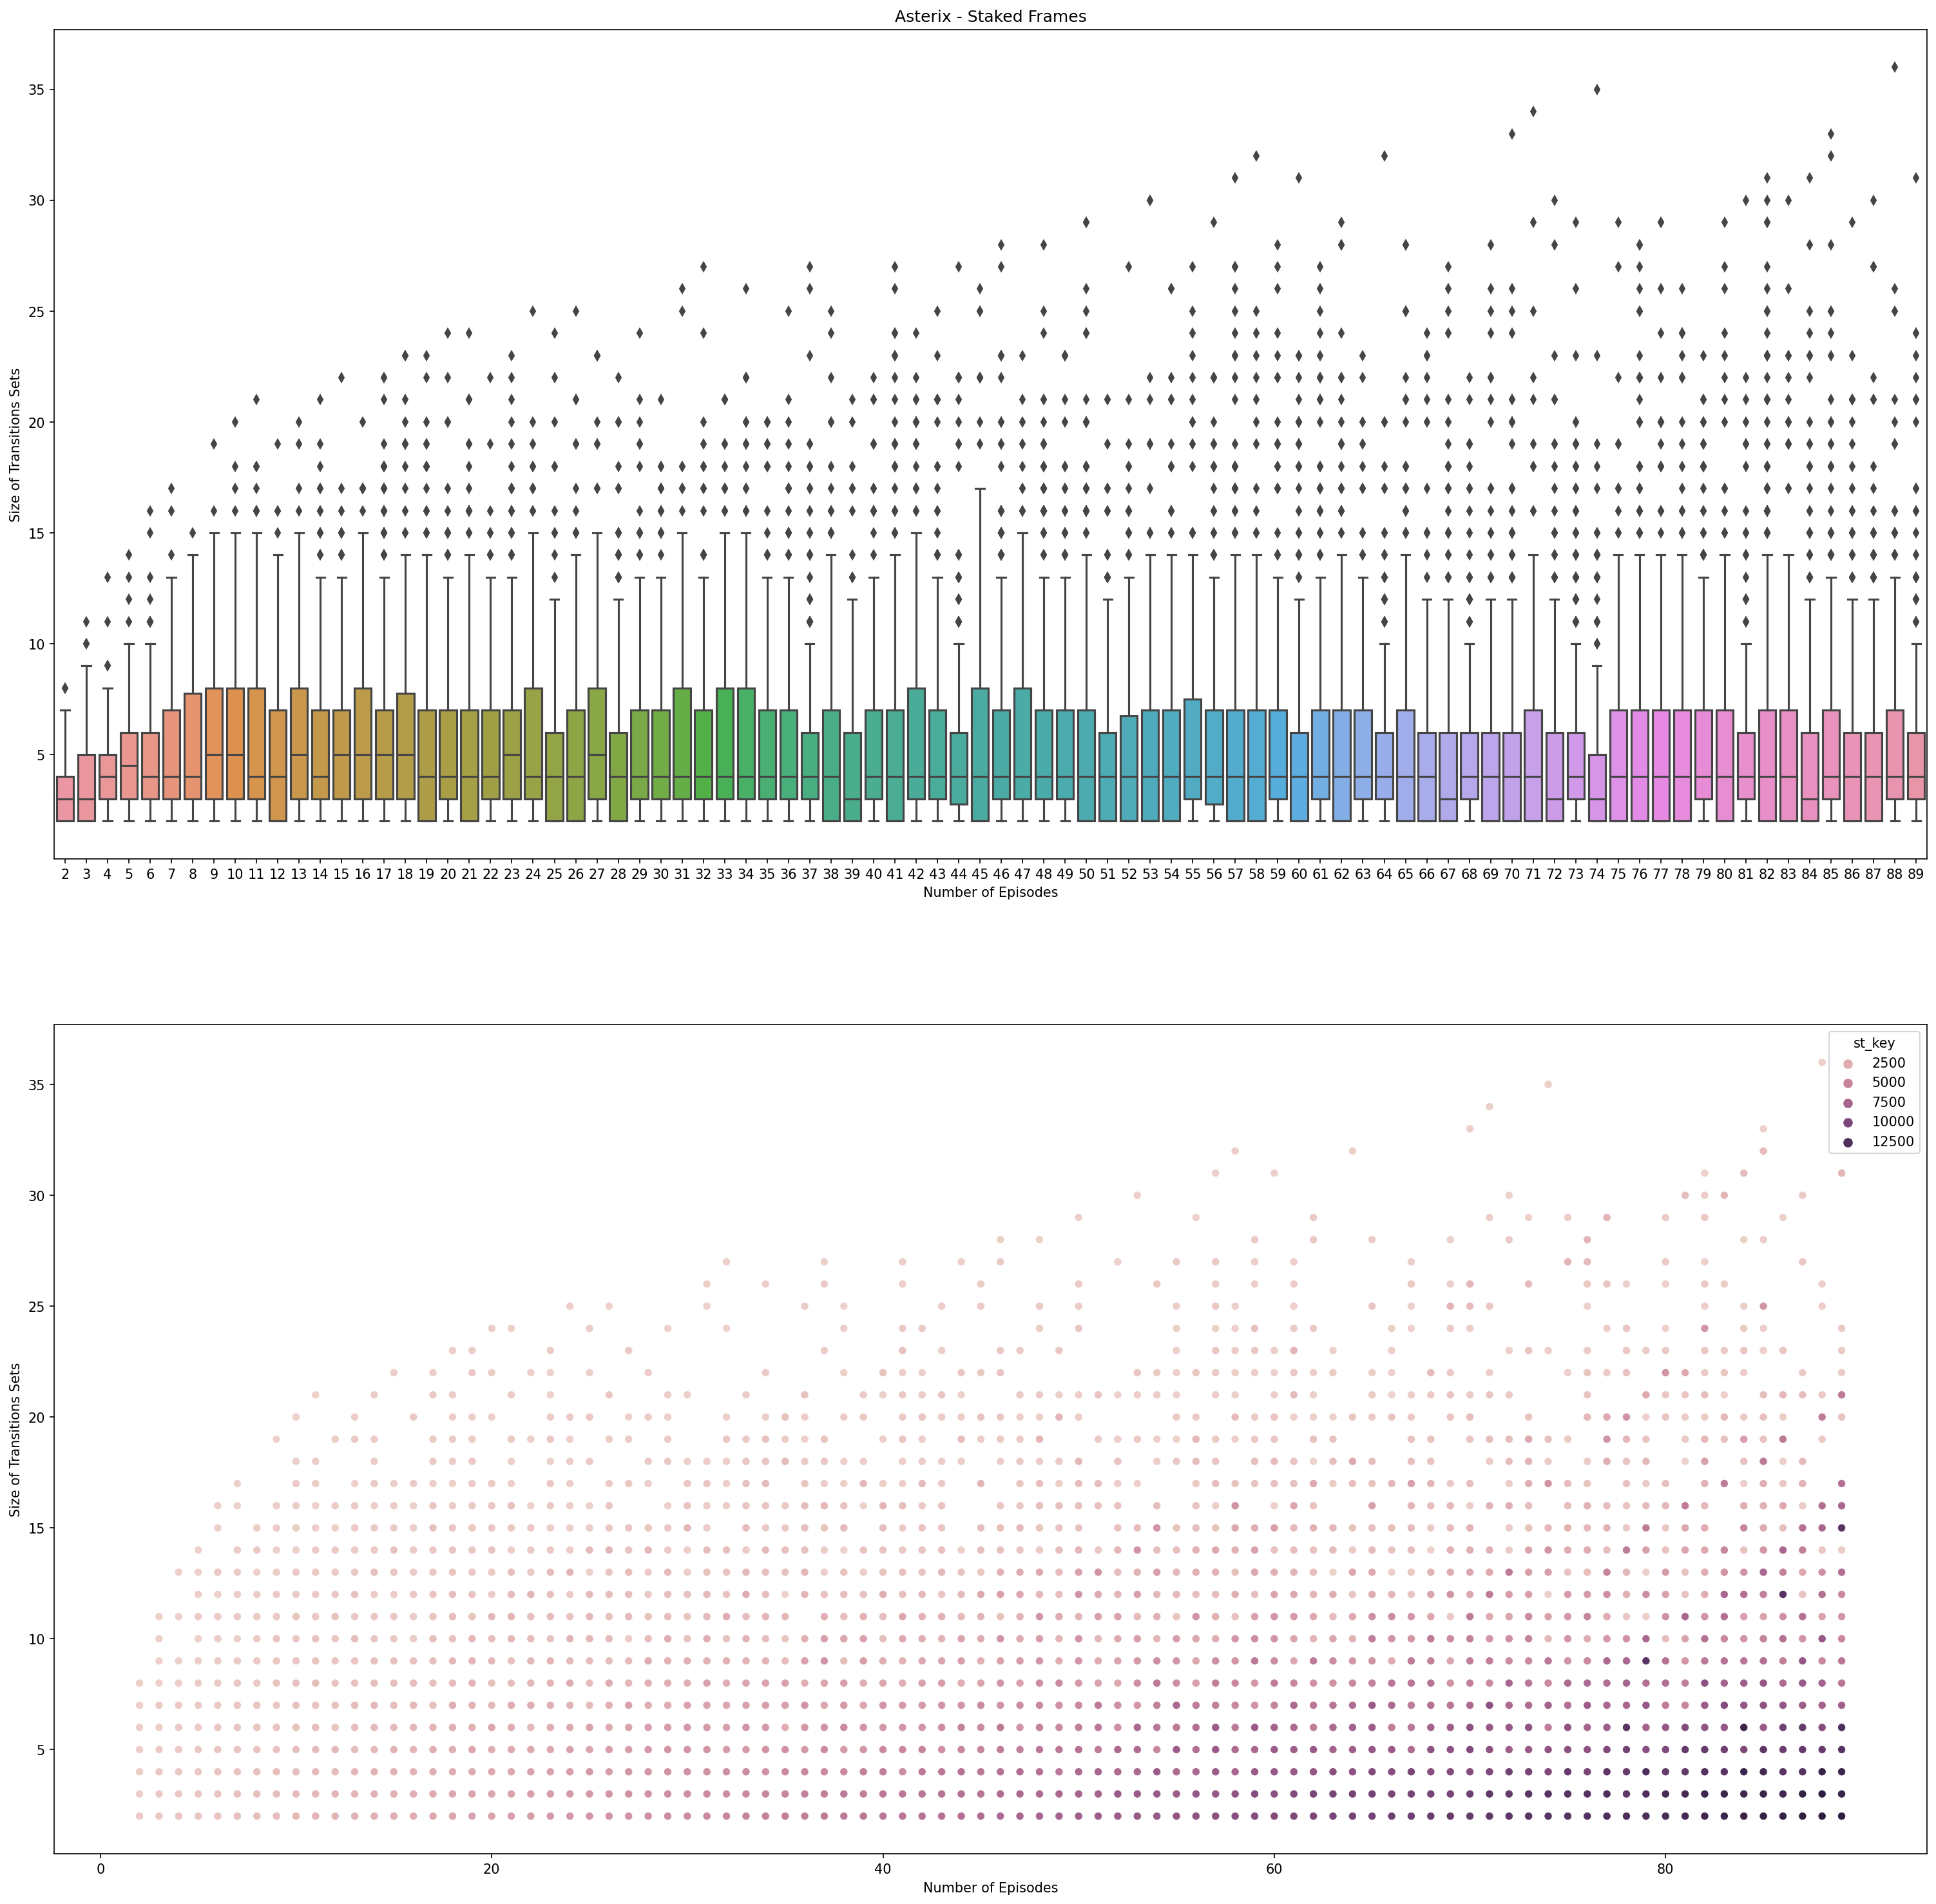

In [6]:
plotter.counts(df=df_stacked,h=25,w=25,title="Asterix - Staked Frames")

## ASTEROIDS

In [7]:
df_single,df_stacked = get_game_data("v5-asteroids")

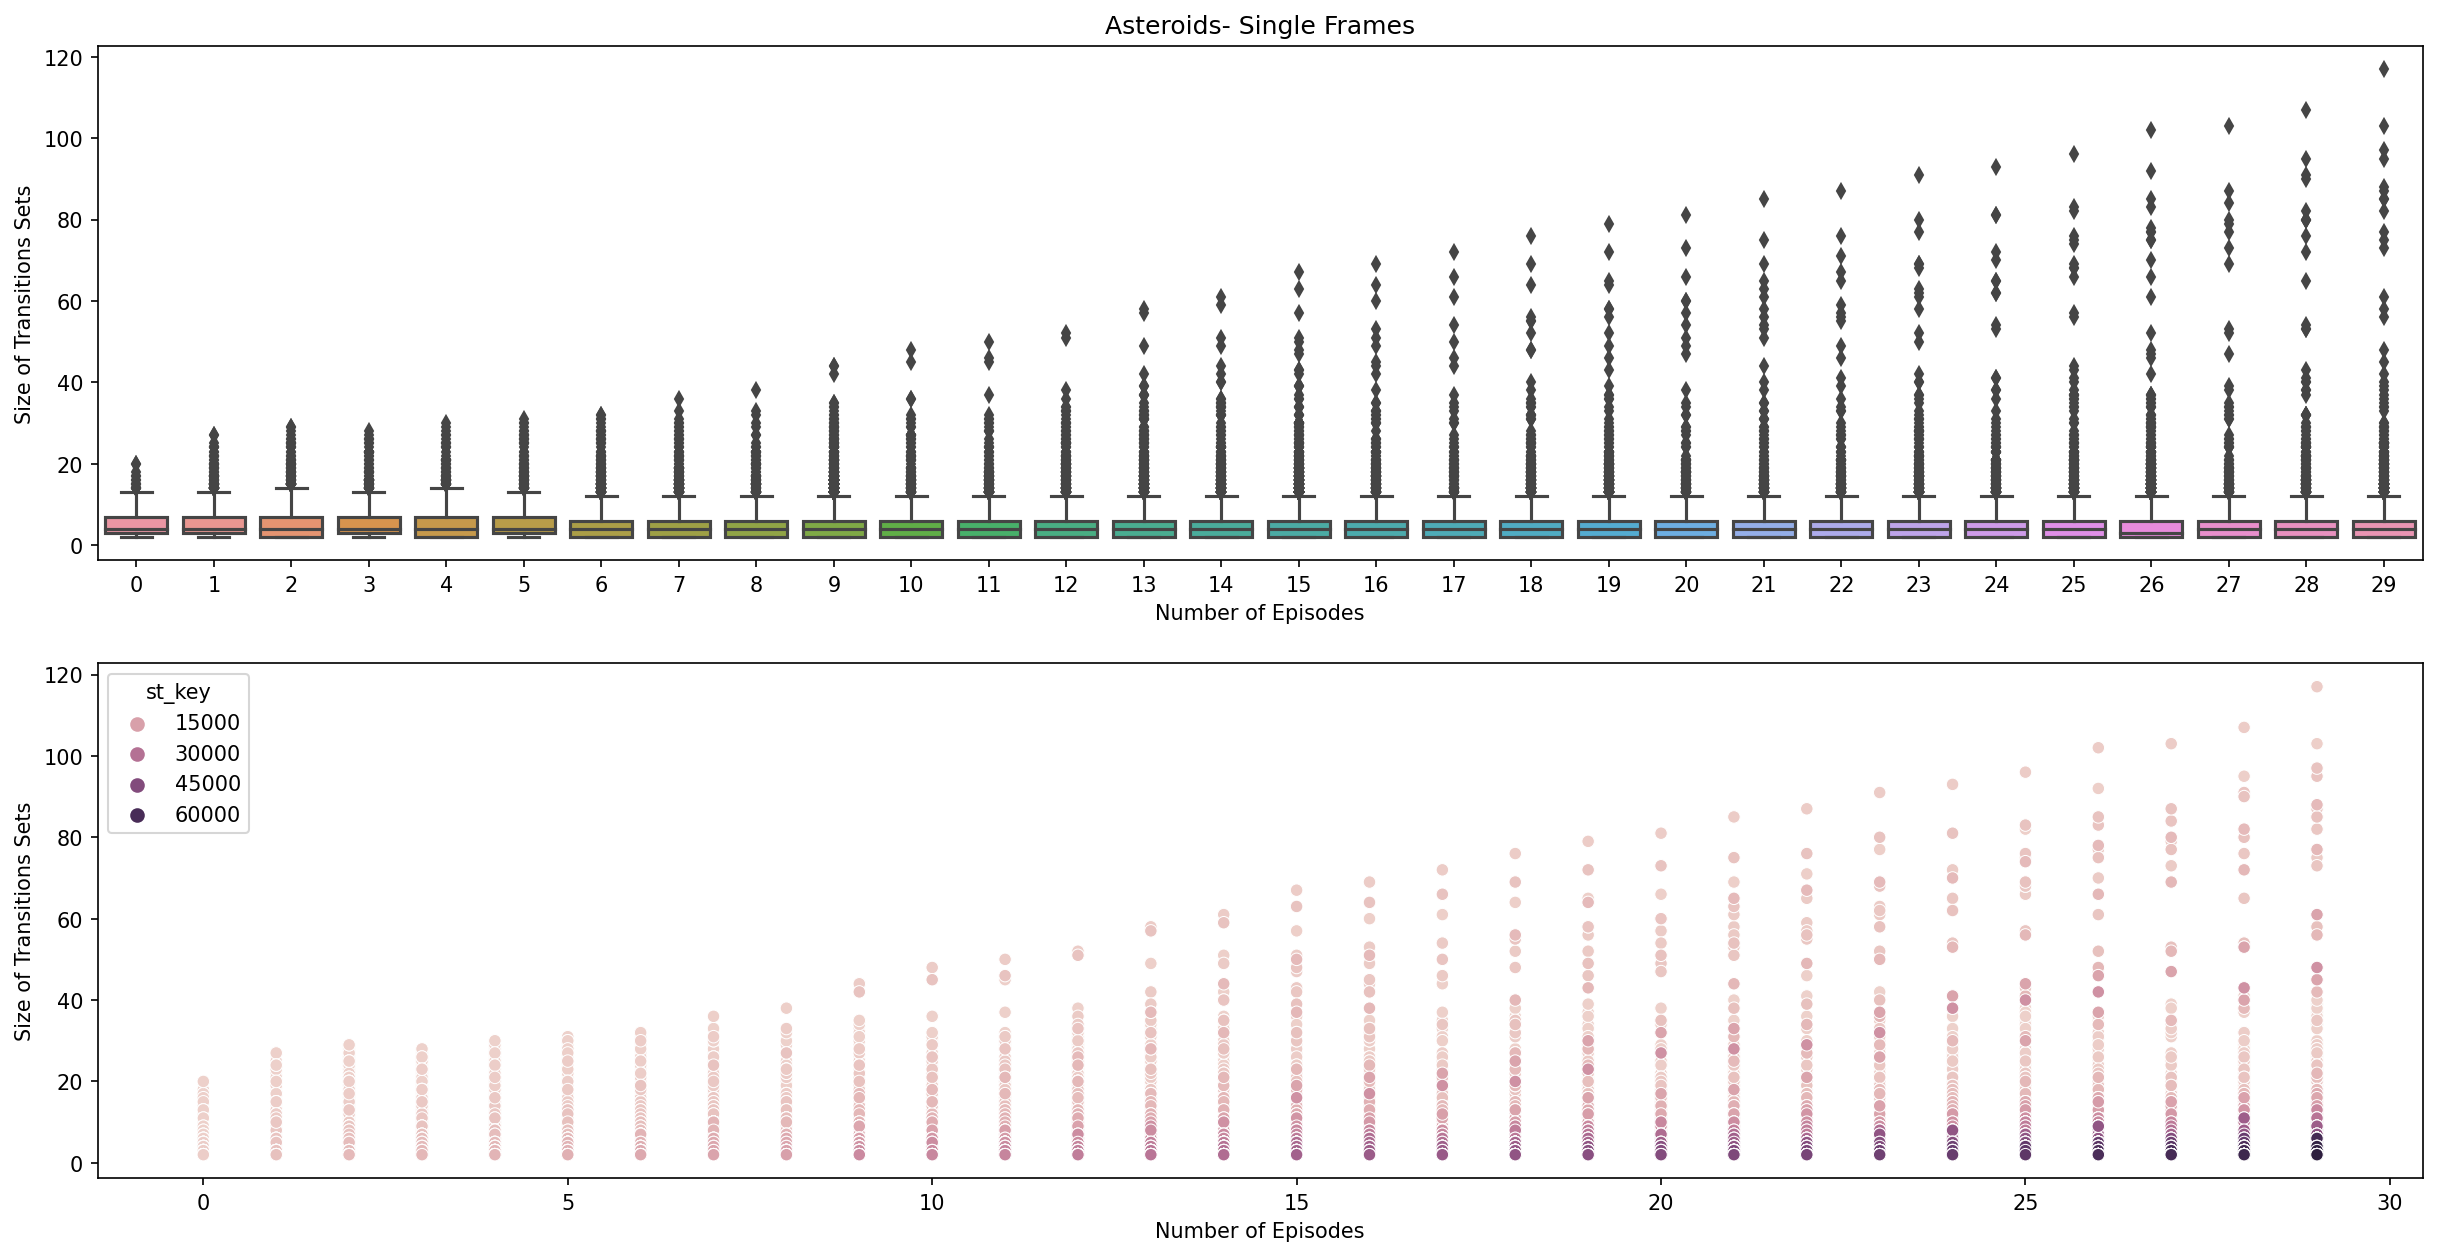

In [8]:
plotter.counts(df=df_single,h=10,w=20,title="Asteroids- Single Frames")

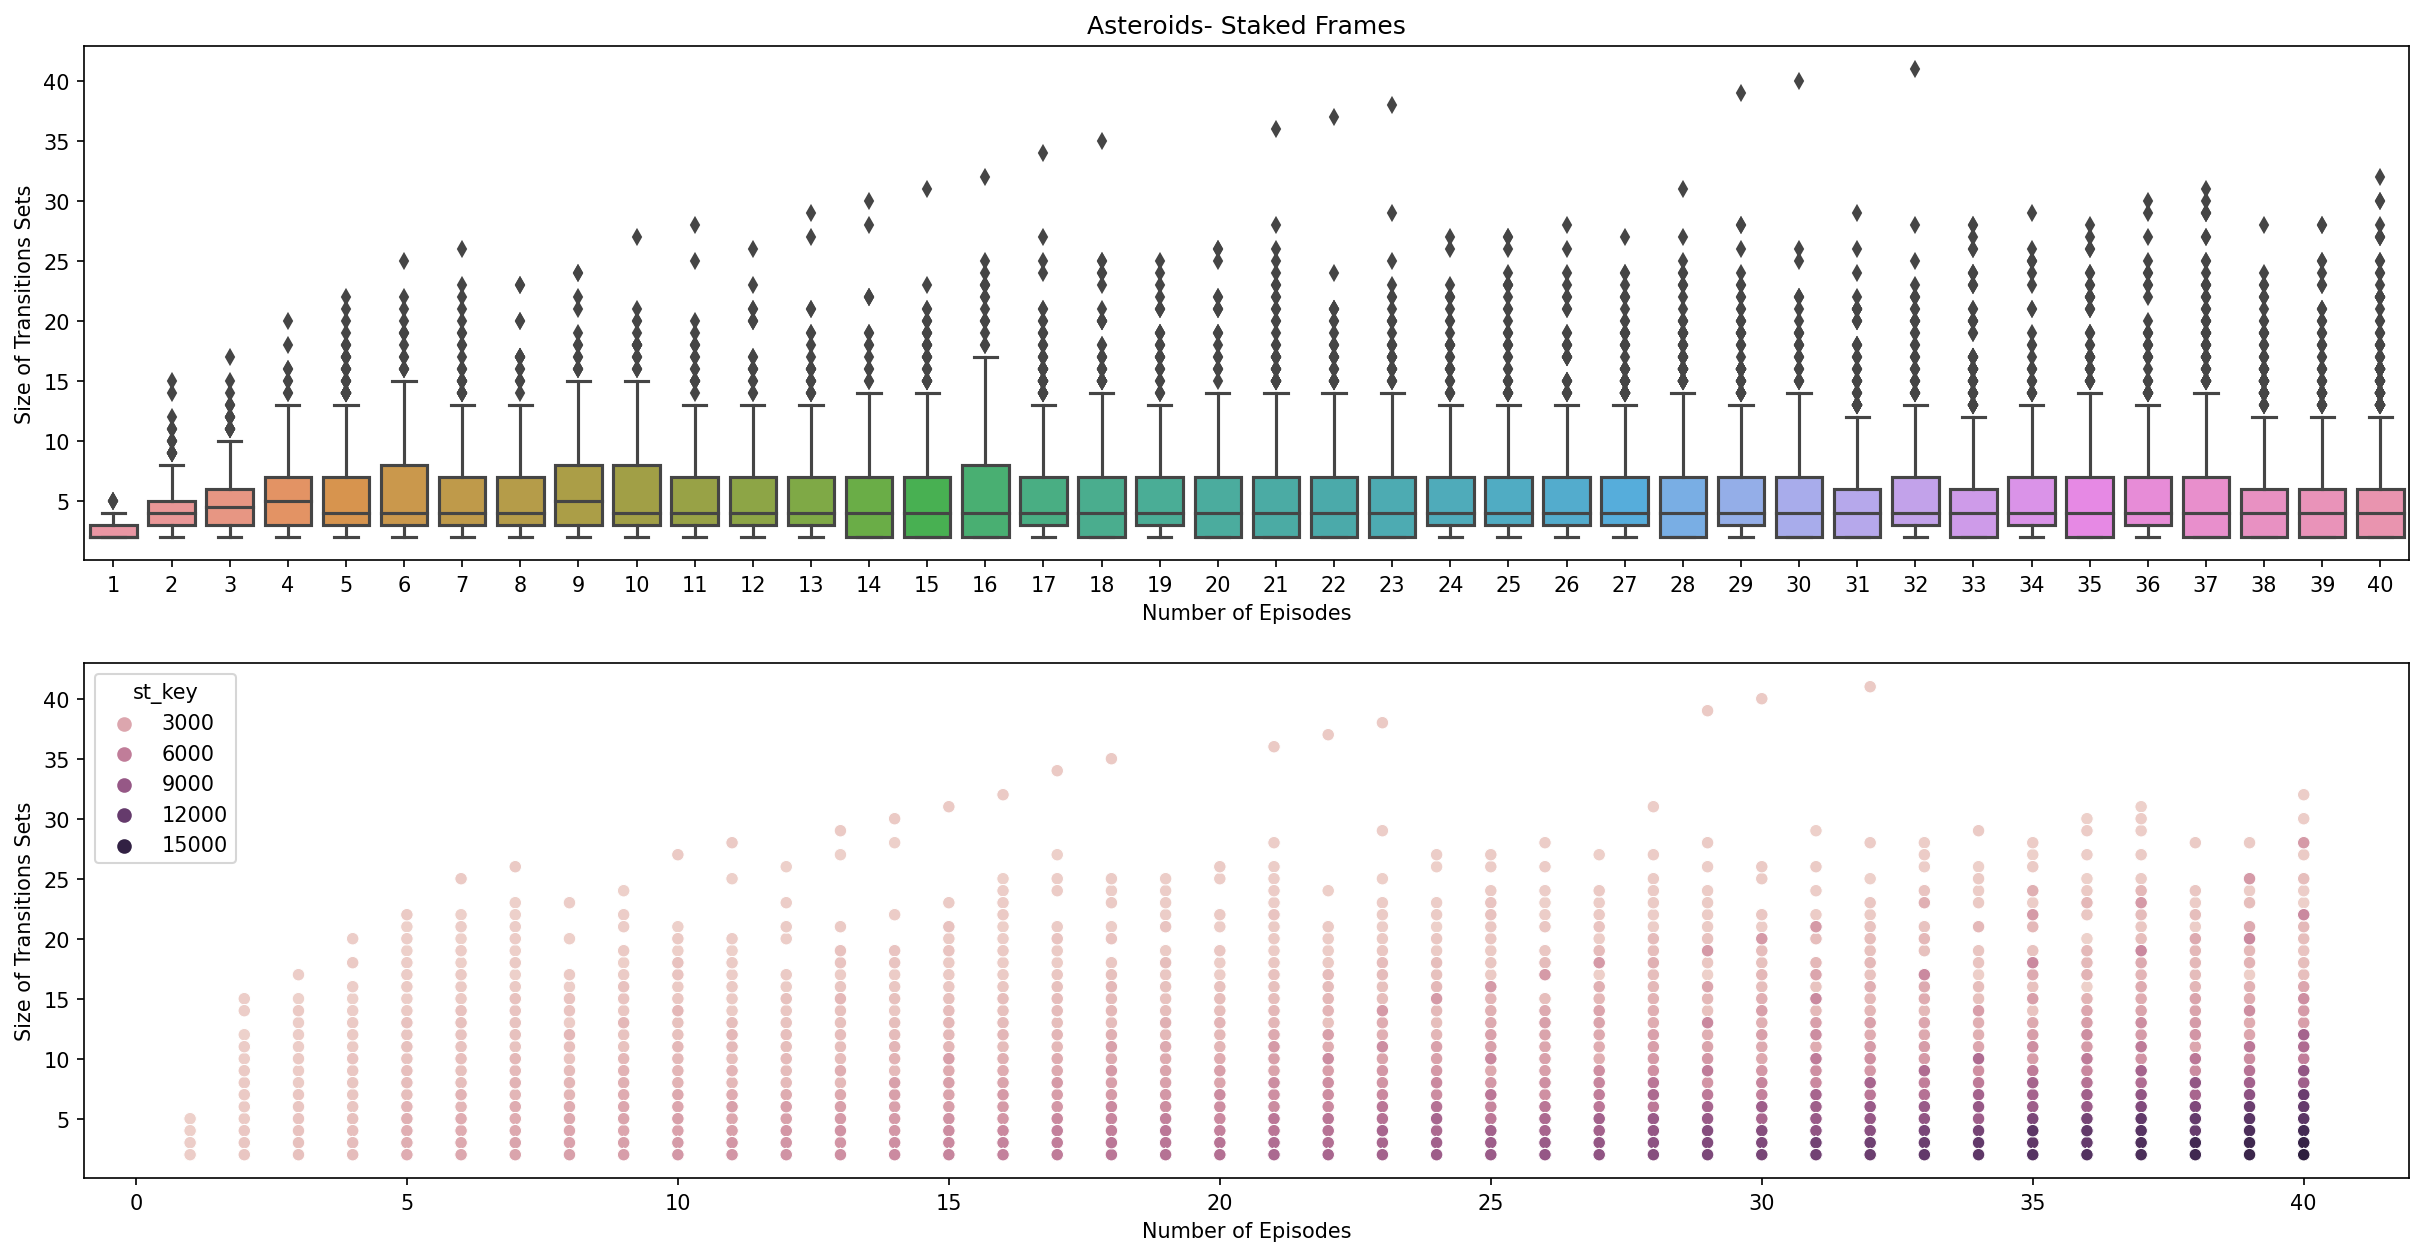

In [9]:
plotter.counts(df=df_stacked,h=10,w=20,title="Asteroids- Staked Frames")

## BATTLE ZONE

In [10]:
df_single,df_stacked = get_game_data("v5-battle_zone")

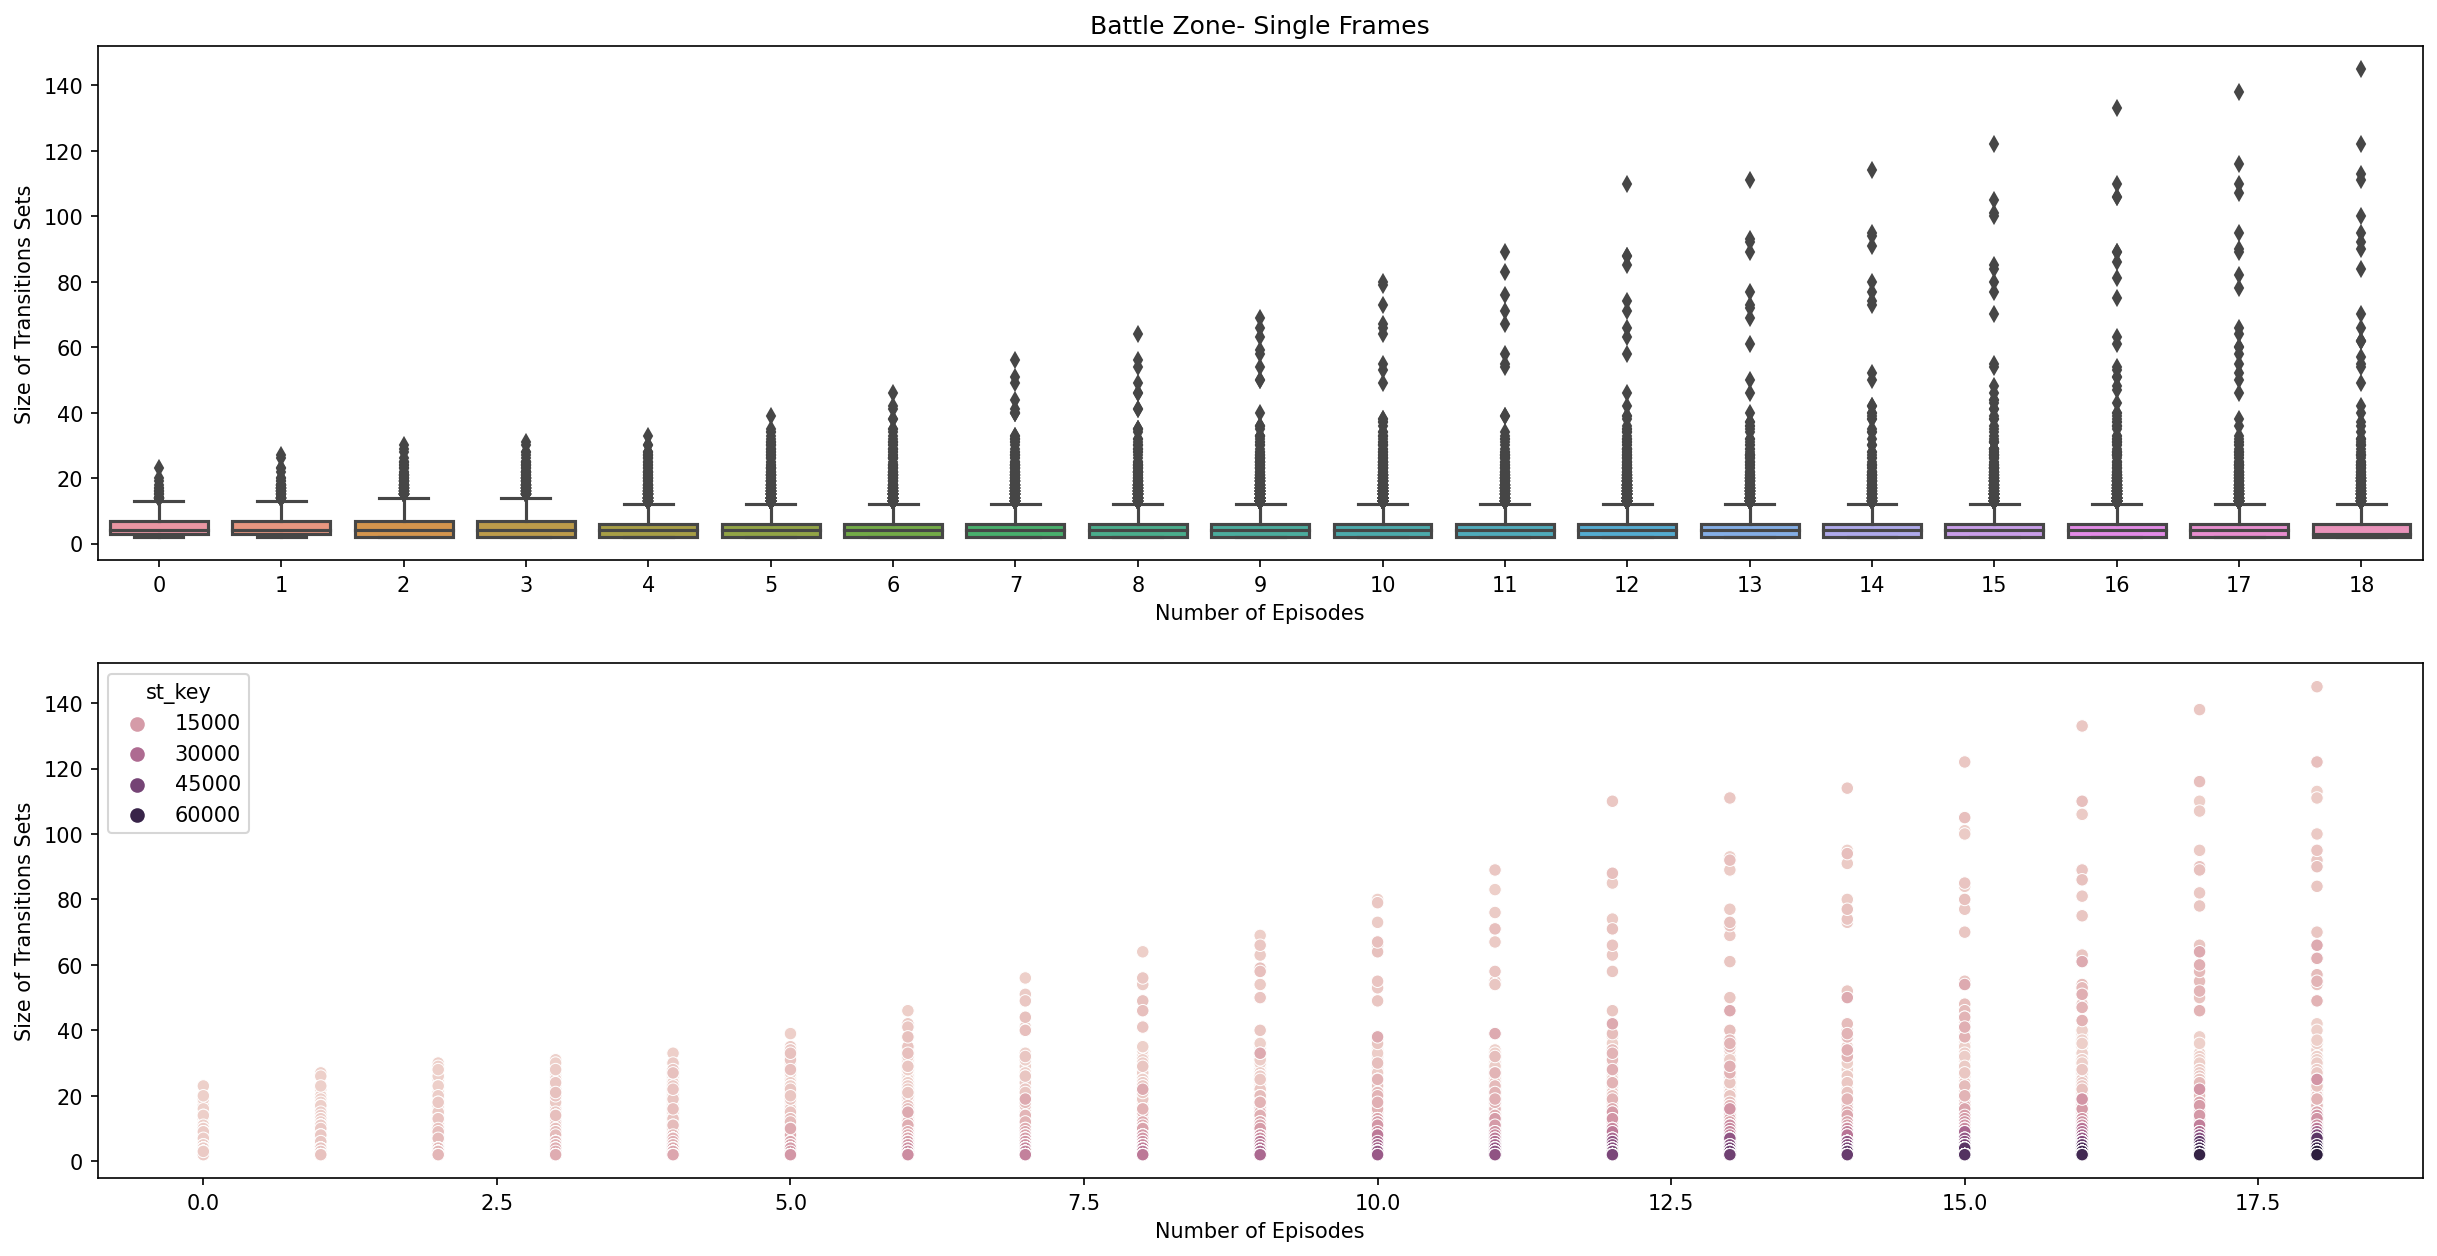

In [11]:
plotter.counts(df=df_single,h=10,w=20,title="Battle Zone- Single Frames")

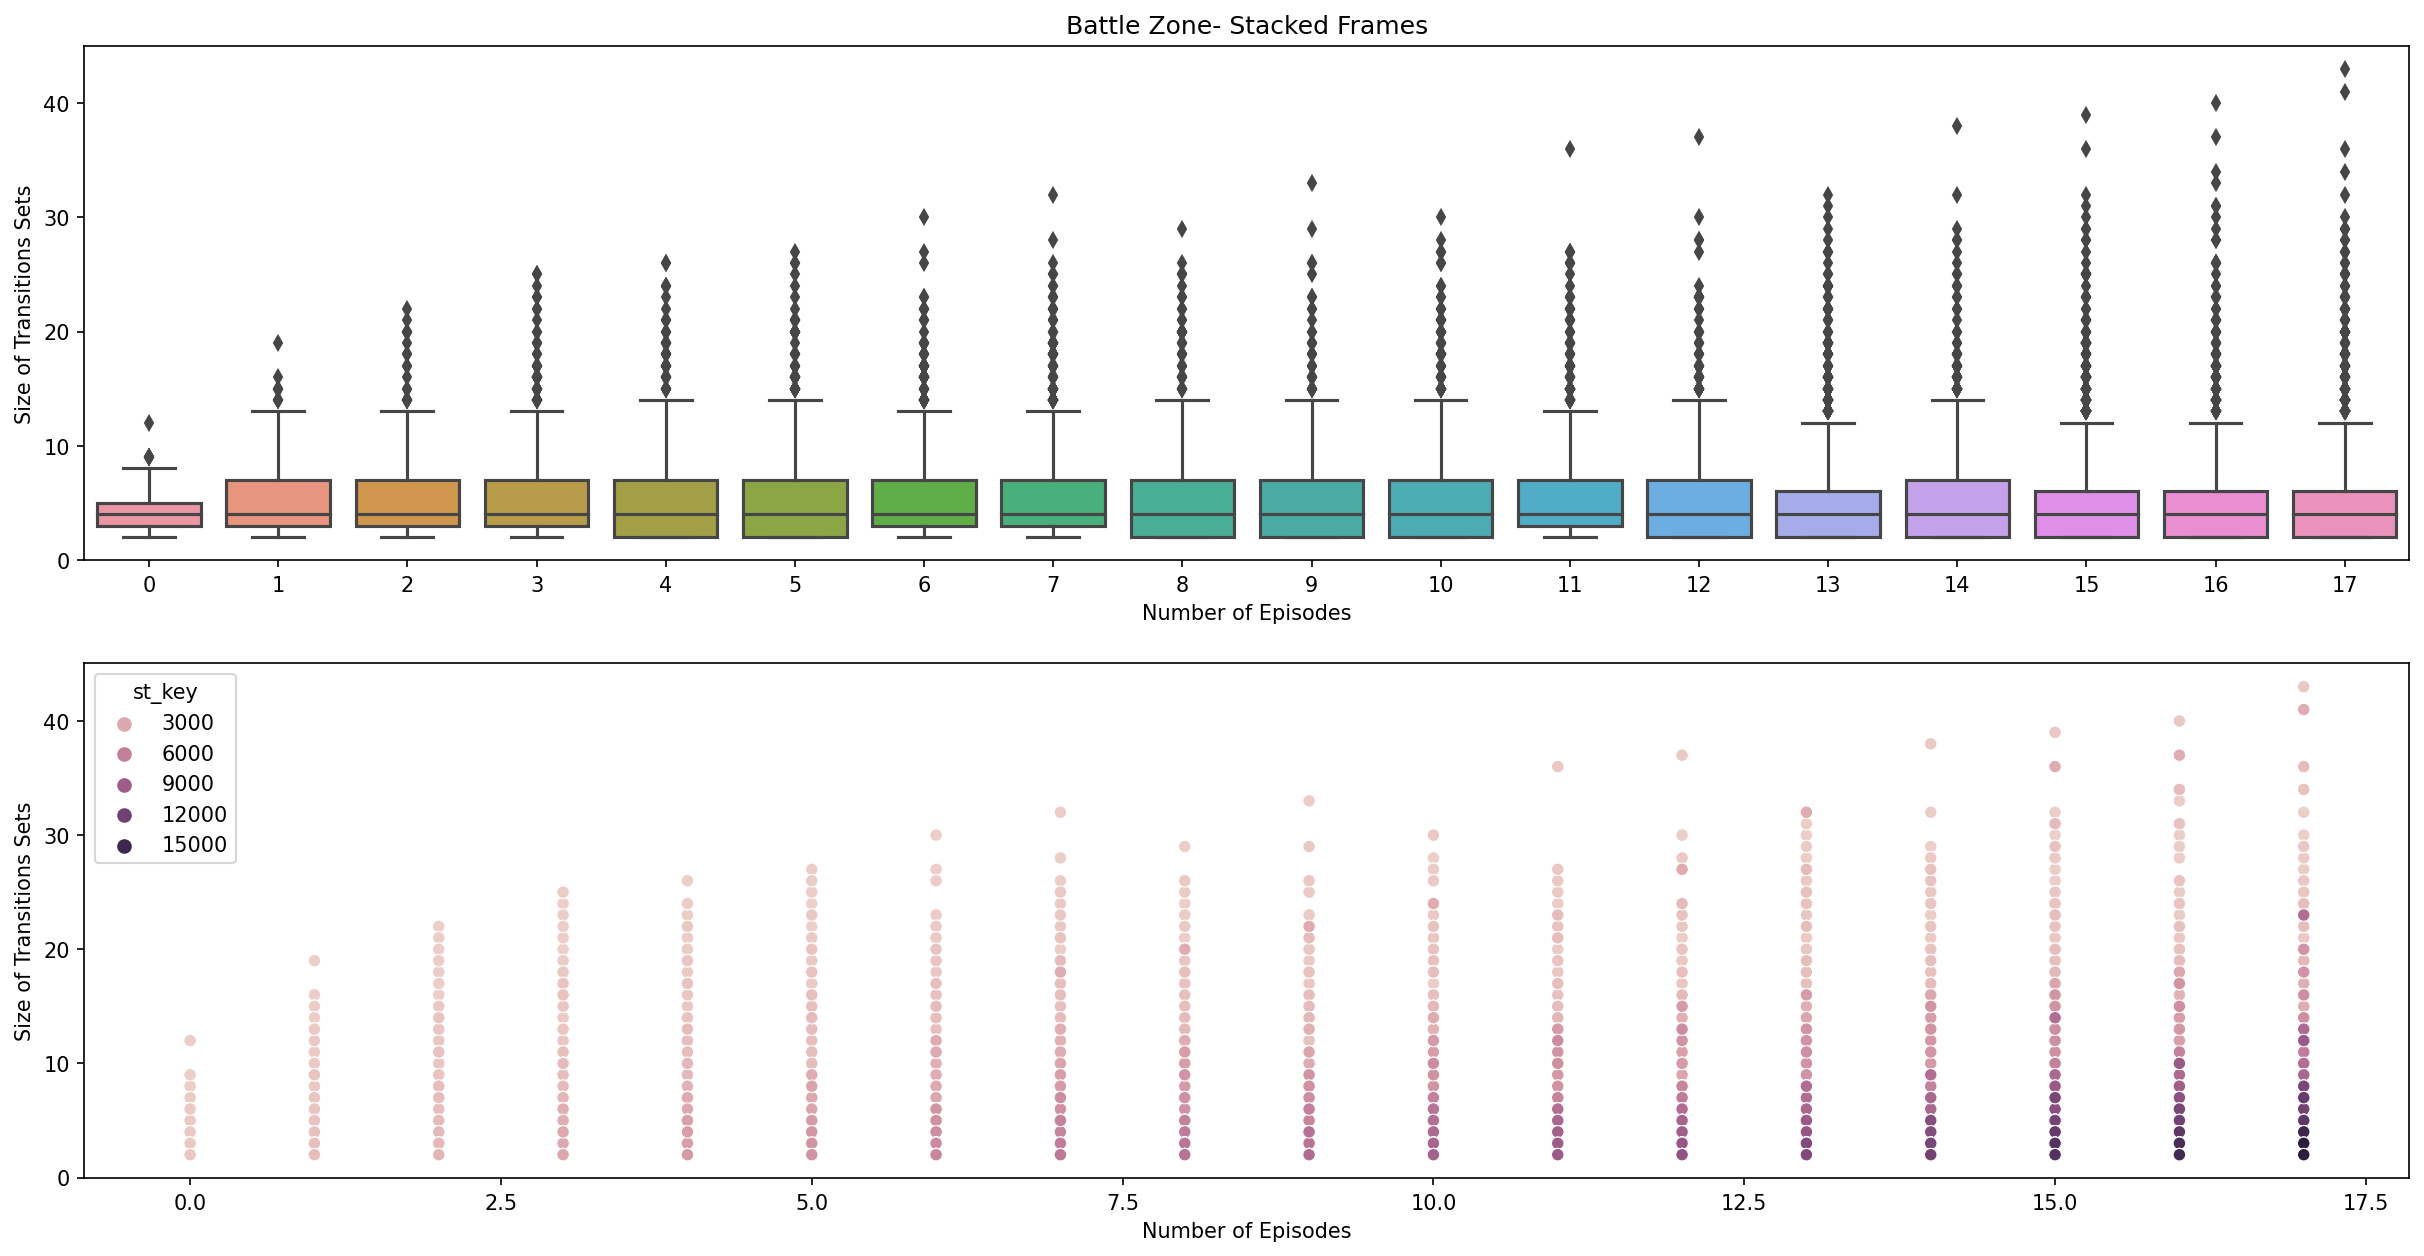

In [12]:
plotter.counts(df=df_stacked,h=10,w=20,title="Battle Zone- Stacked Frames")

## BEAM RIDER

In [39]:
df_single,df_stacked = get_game_data("v5-beam_rider")

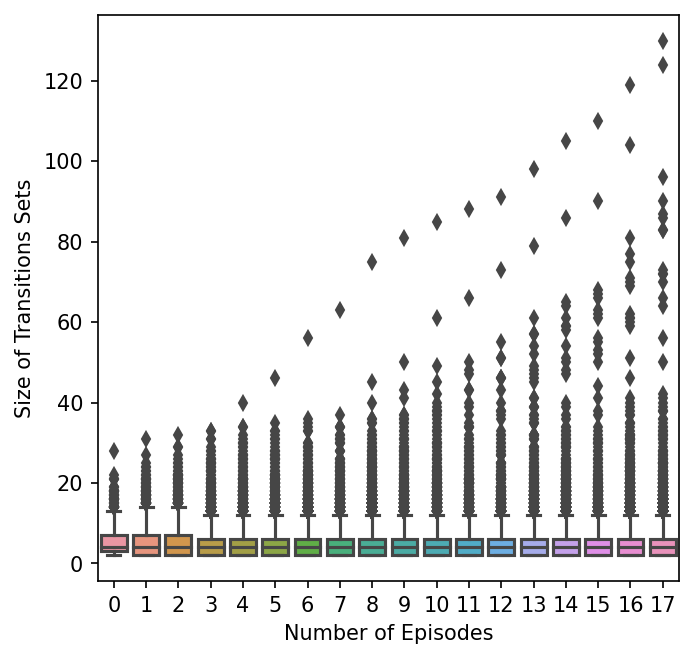

In [40]:
#plotter.counts(df=df_single,h=10,w=20,title="Beam Rider- Single Frames")
plotter.counts2(df=df_single,h=5,w=5)

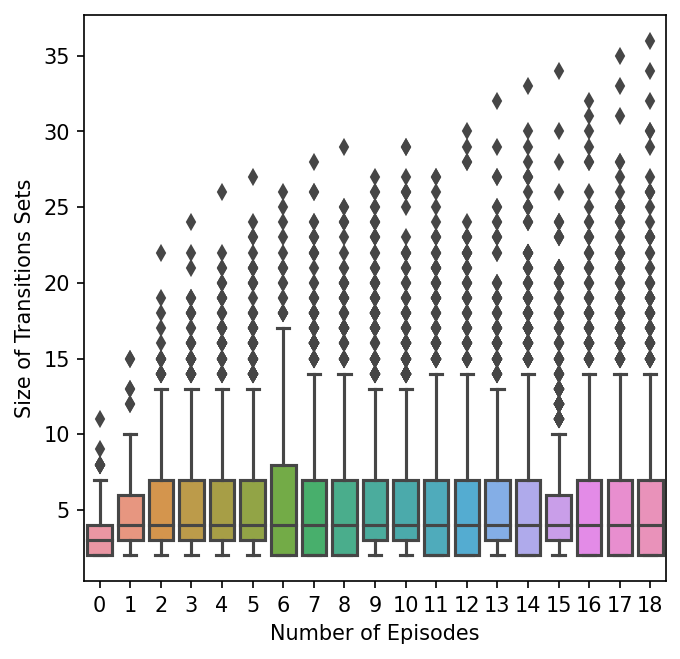

In [41]:
#plotter.counts(df=df_stacked,h=10,w=20,title="Beam Rider- Stacked Frames")
plotter.counts2(df=df_stacked,h=5,w=5)

## FREEWAY

In [63]:
df_single,df_stacked = get_game_data("v5-freeway")

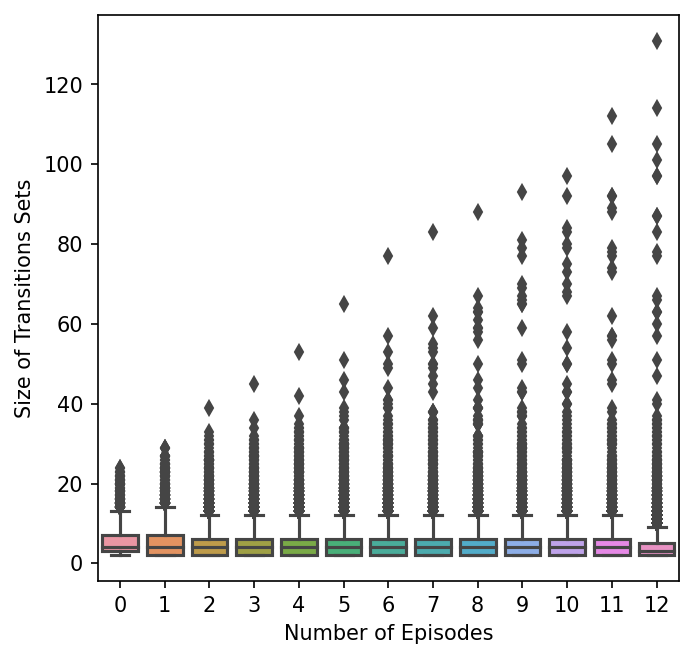

In [76]:
#plotter.counts(df=df_single,h=5,w=5,title="Freeway- Single Frames")
plotter.counts2(df=df_single,h=5,w=5)

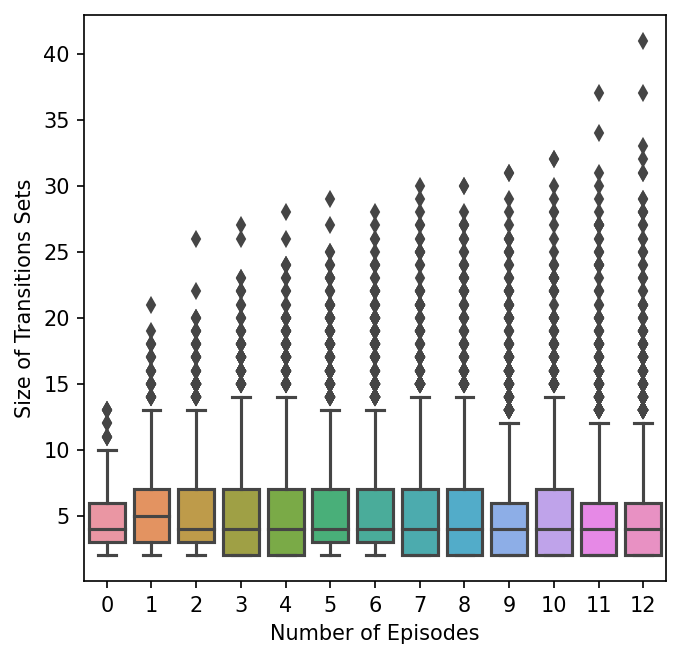

In [77]:
#plotter.counts(df=df_stacked,h=5,w=5,title="Freeway- Stacked Frames")
plotter.counts2(df=df_stacked,h=5,w=5)

## SEAQUEST

In [32]:
df_single,df_stacked = get_game_data("v5-seaquest")

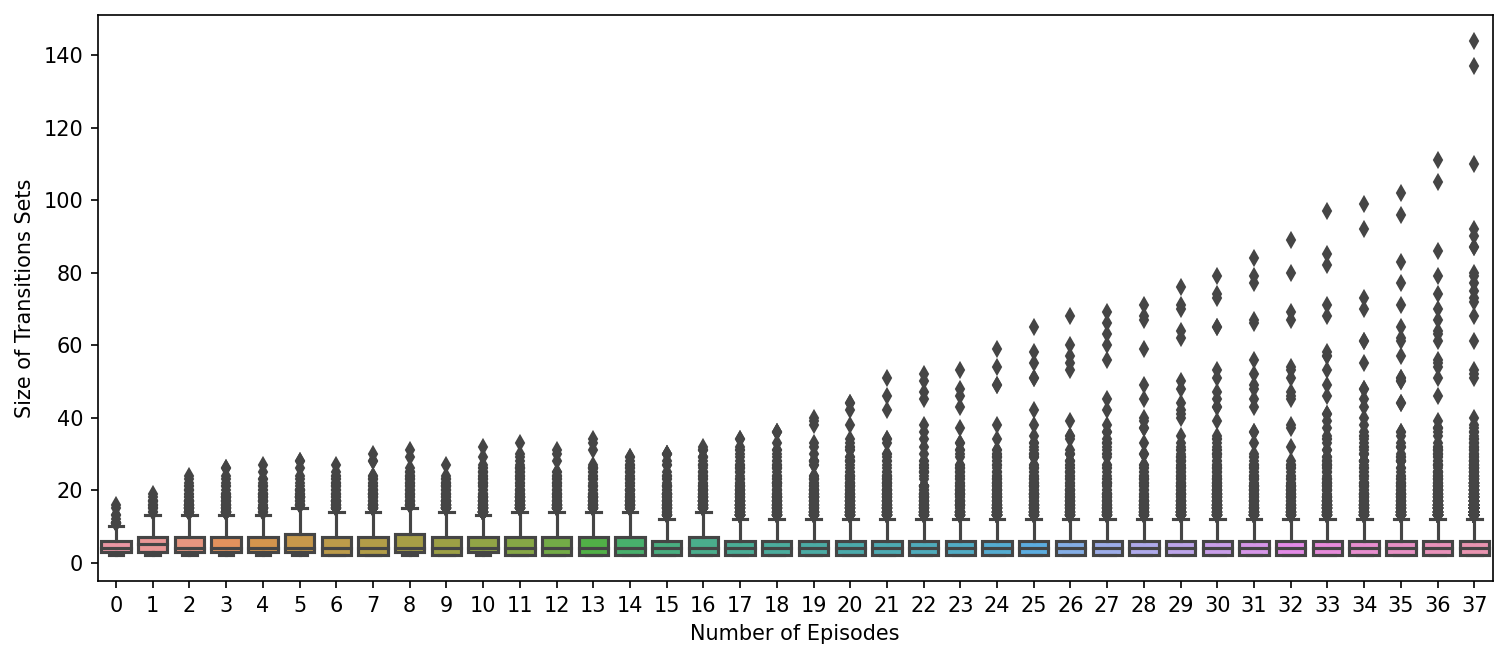

In [37]:
plotter.counts2(df=df_single,h=5,w=12)

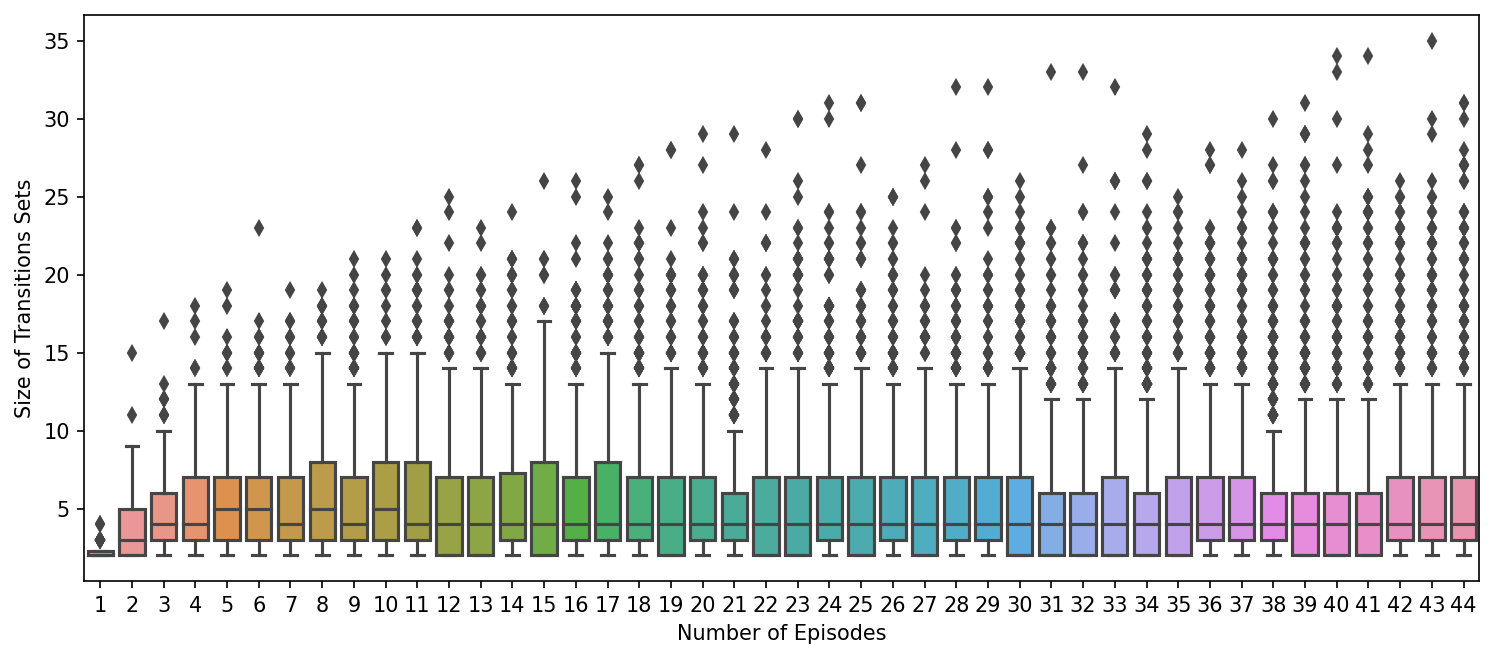

In [36]:
plotter.counts2(df=df_stacked,h=5,w=12)

## SPACE INVADERS

In [20]:
df_single,df_stacked = get_game_data("v5-space_invaders")

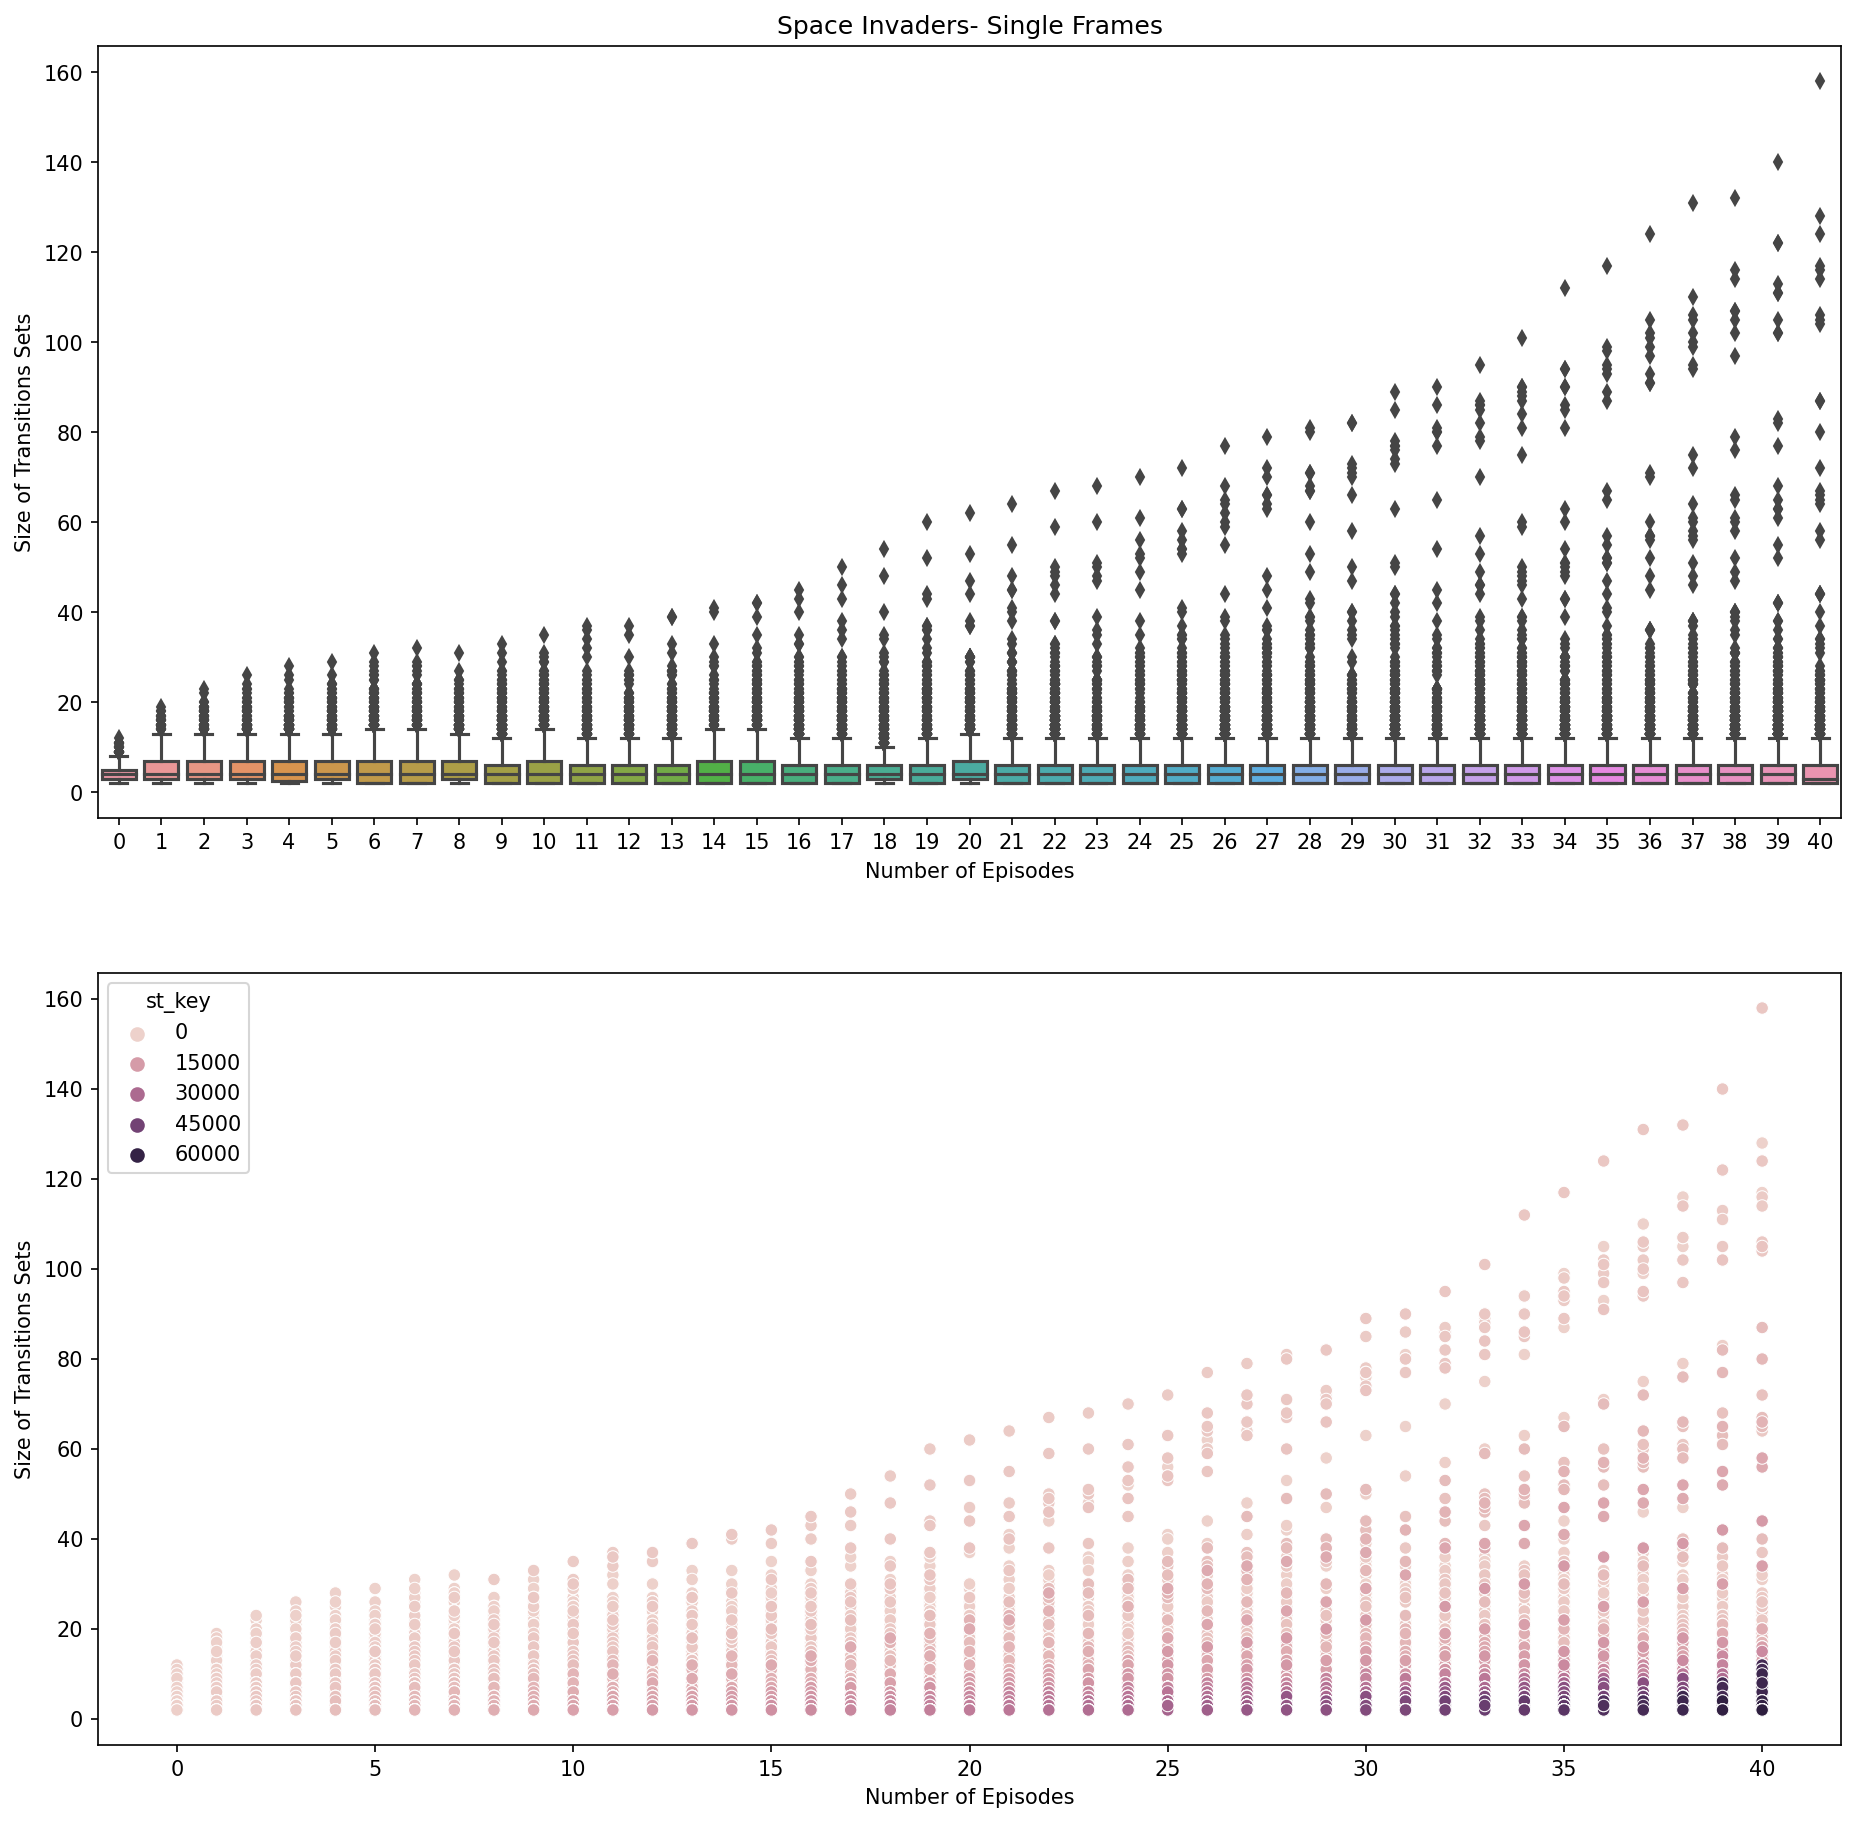

In [21]:
plotter.counts(df=df_single,h=15,w=15,title="Space Invaders- Single Frames")

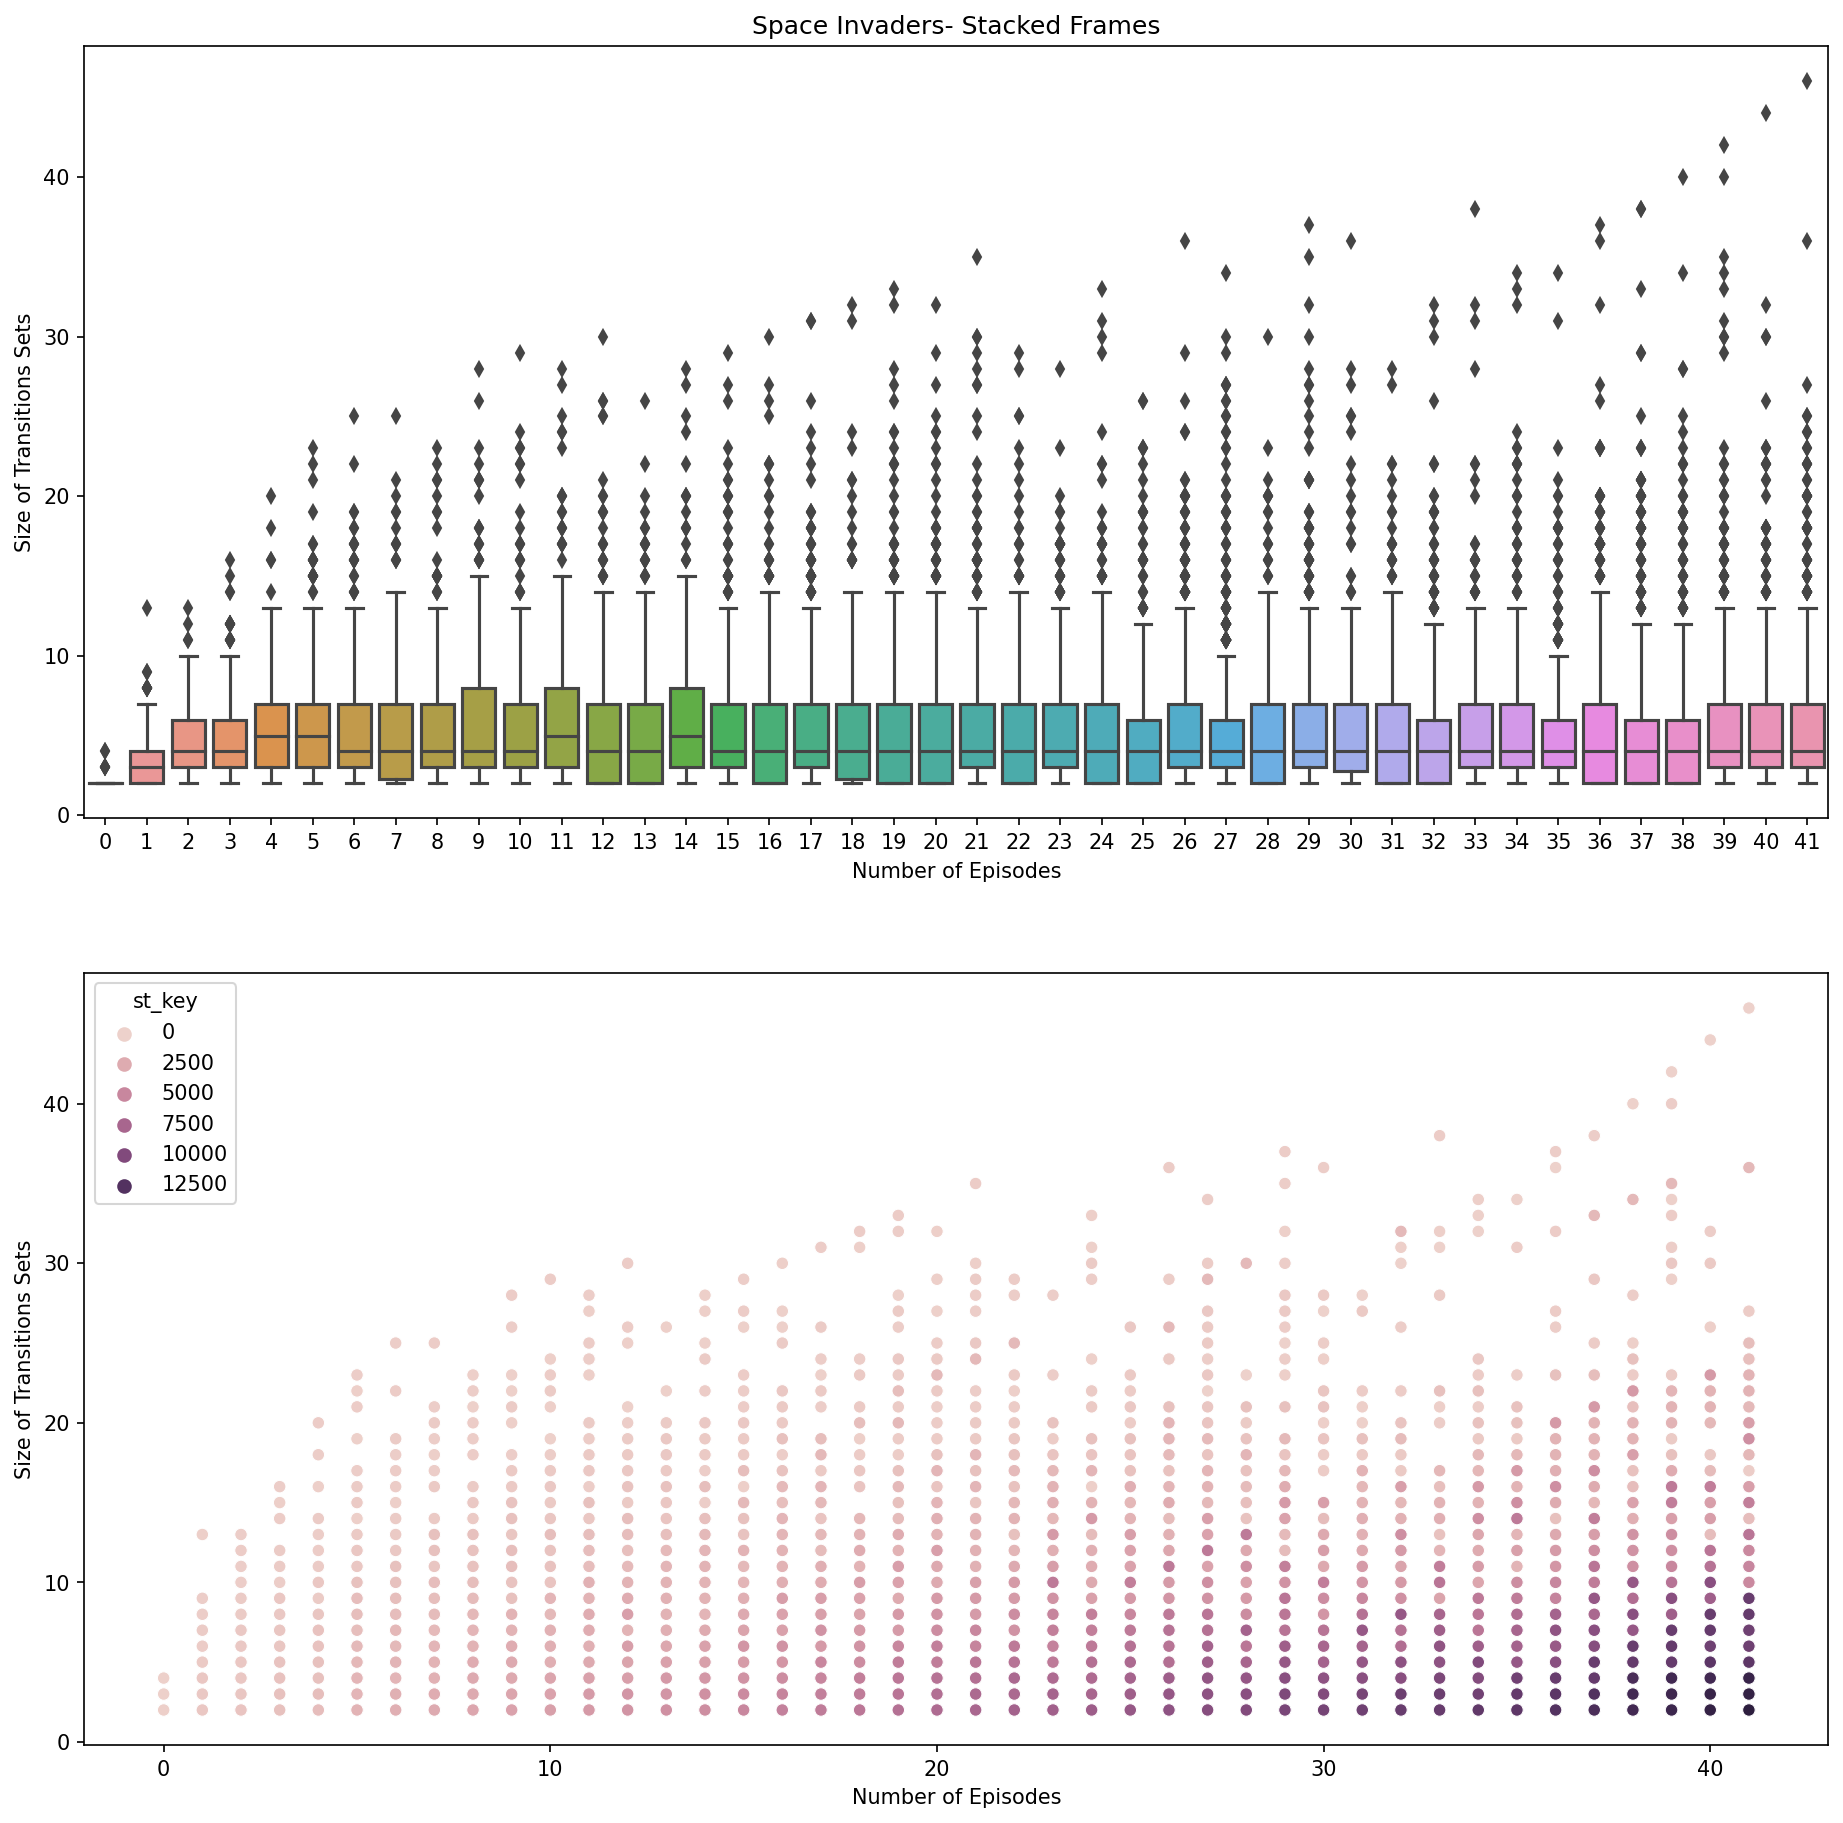

In [22]:
plotter.counts(df=df_stacked,h=15,w=15,title="Space Invaders- Stacked Frames")

## VIDEO PINBALL

In [23]:
df_single,df_stacked = get_game_data("v5-video_pinball")

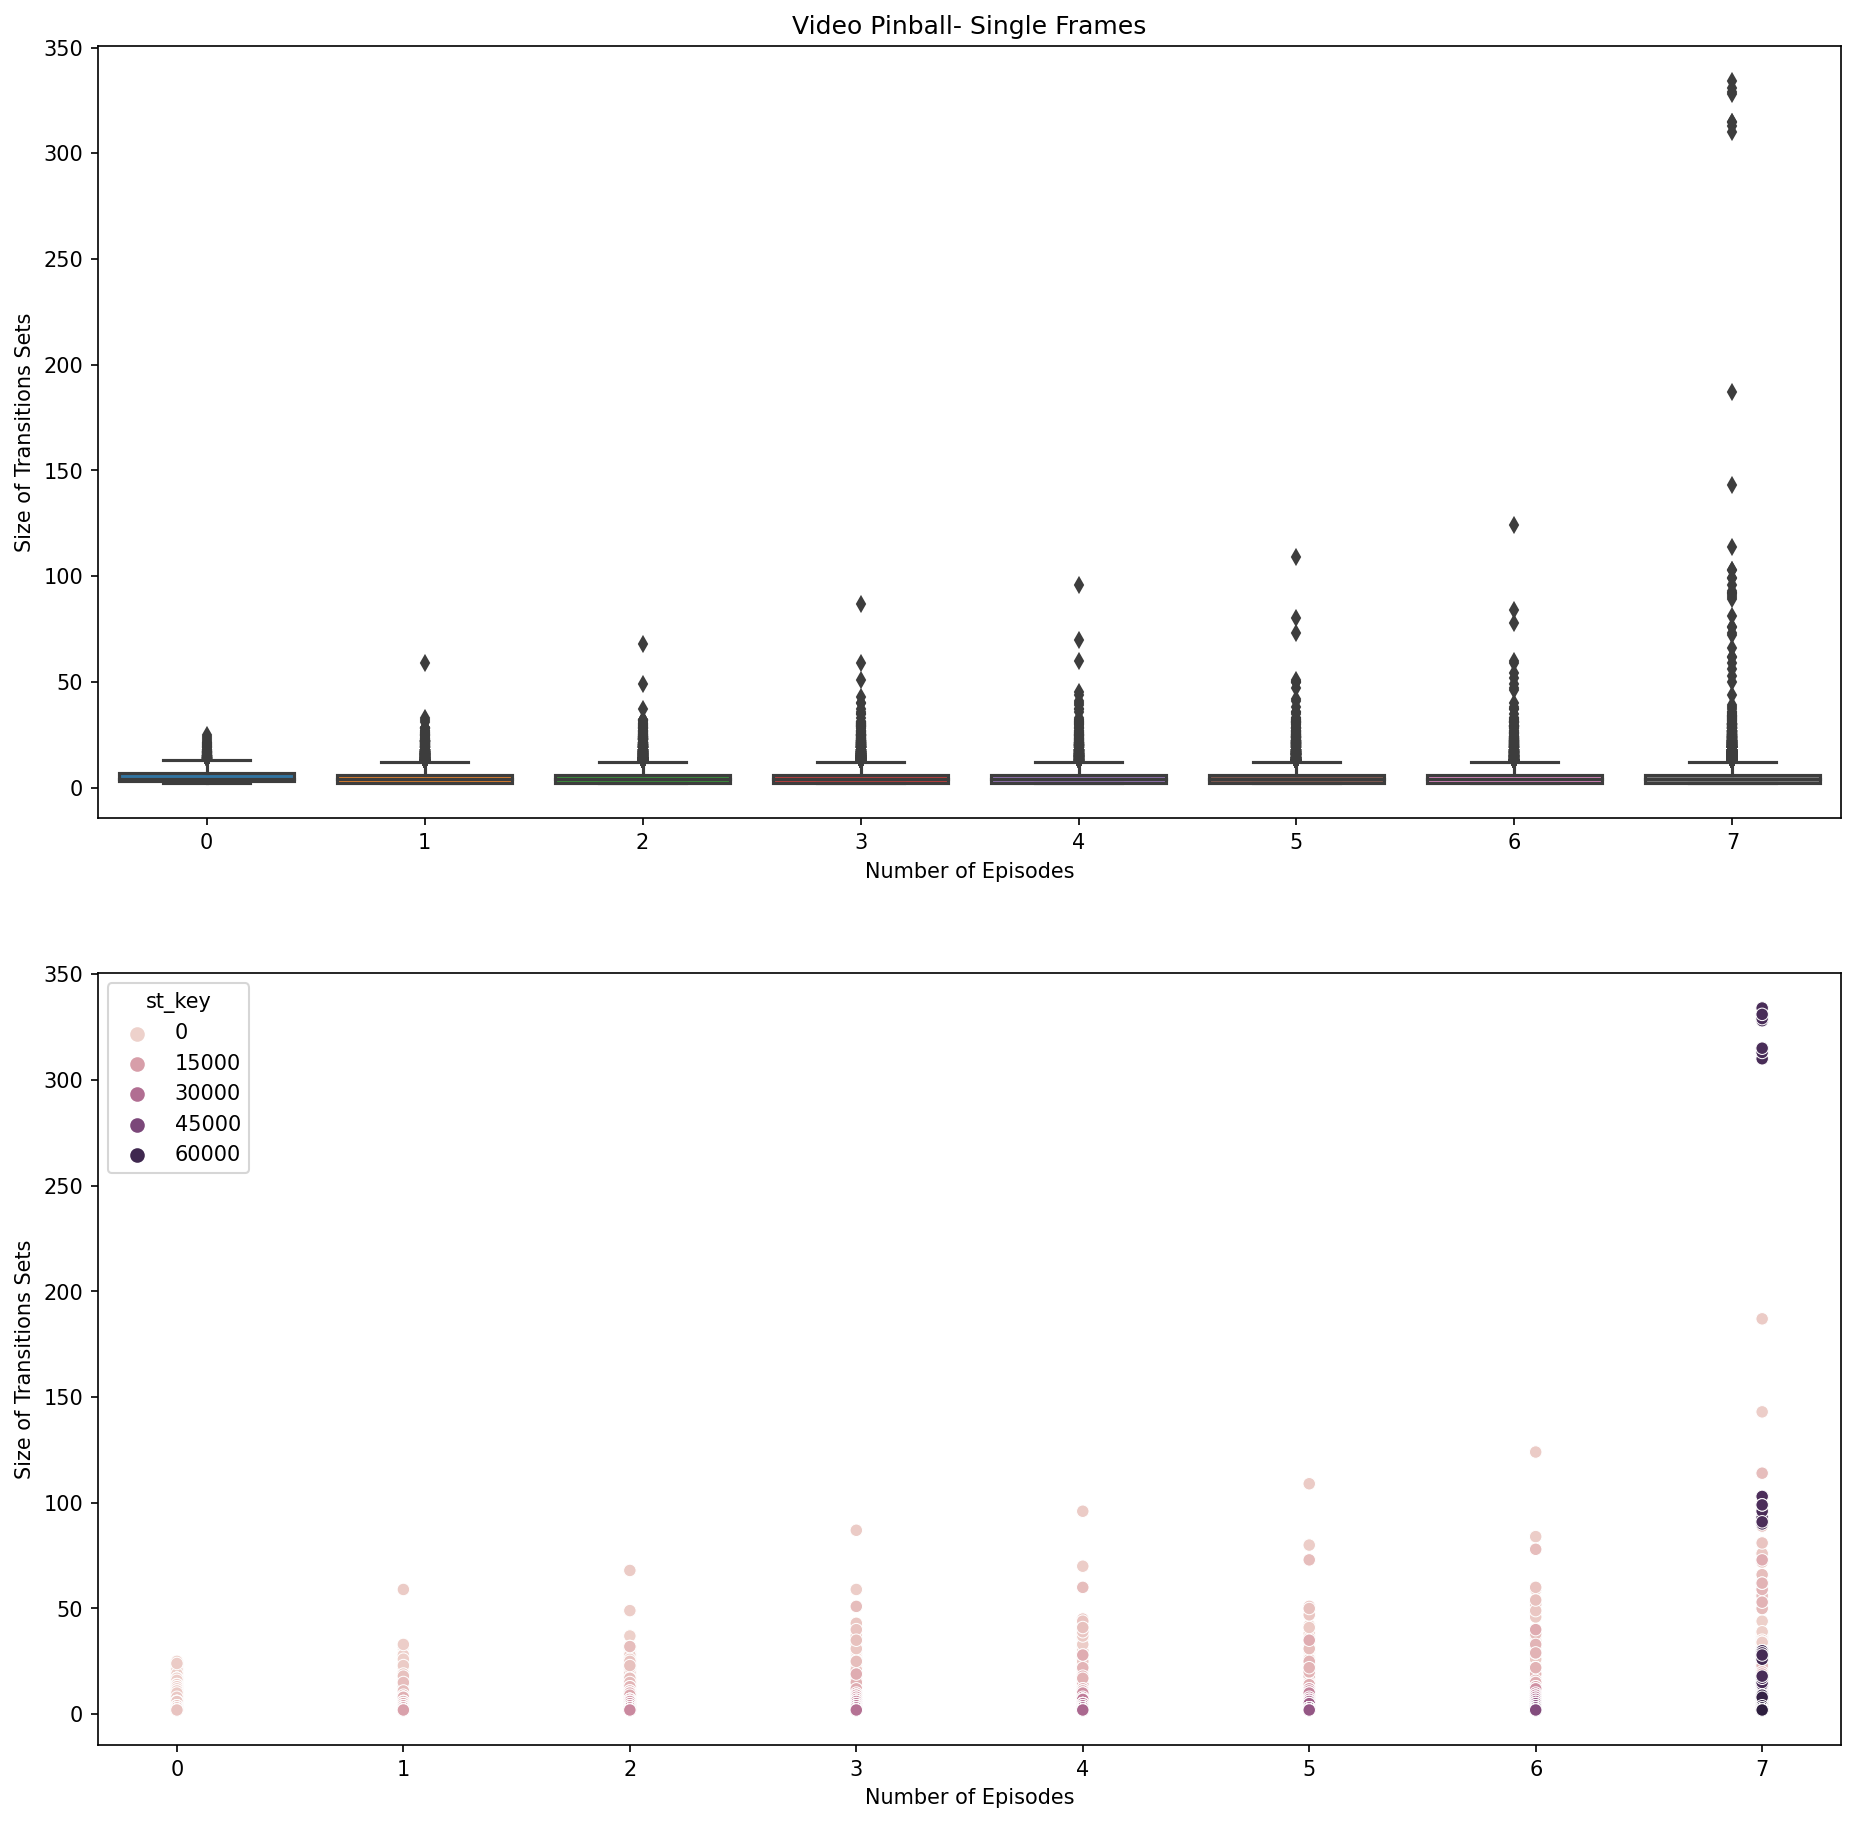

In [24]:
plotter.counts(df=df_single,h=15,w=15,title="Video Pinball- Single Frames")

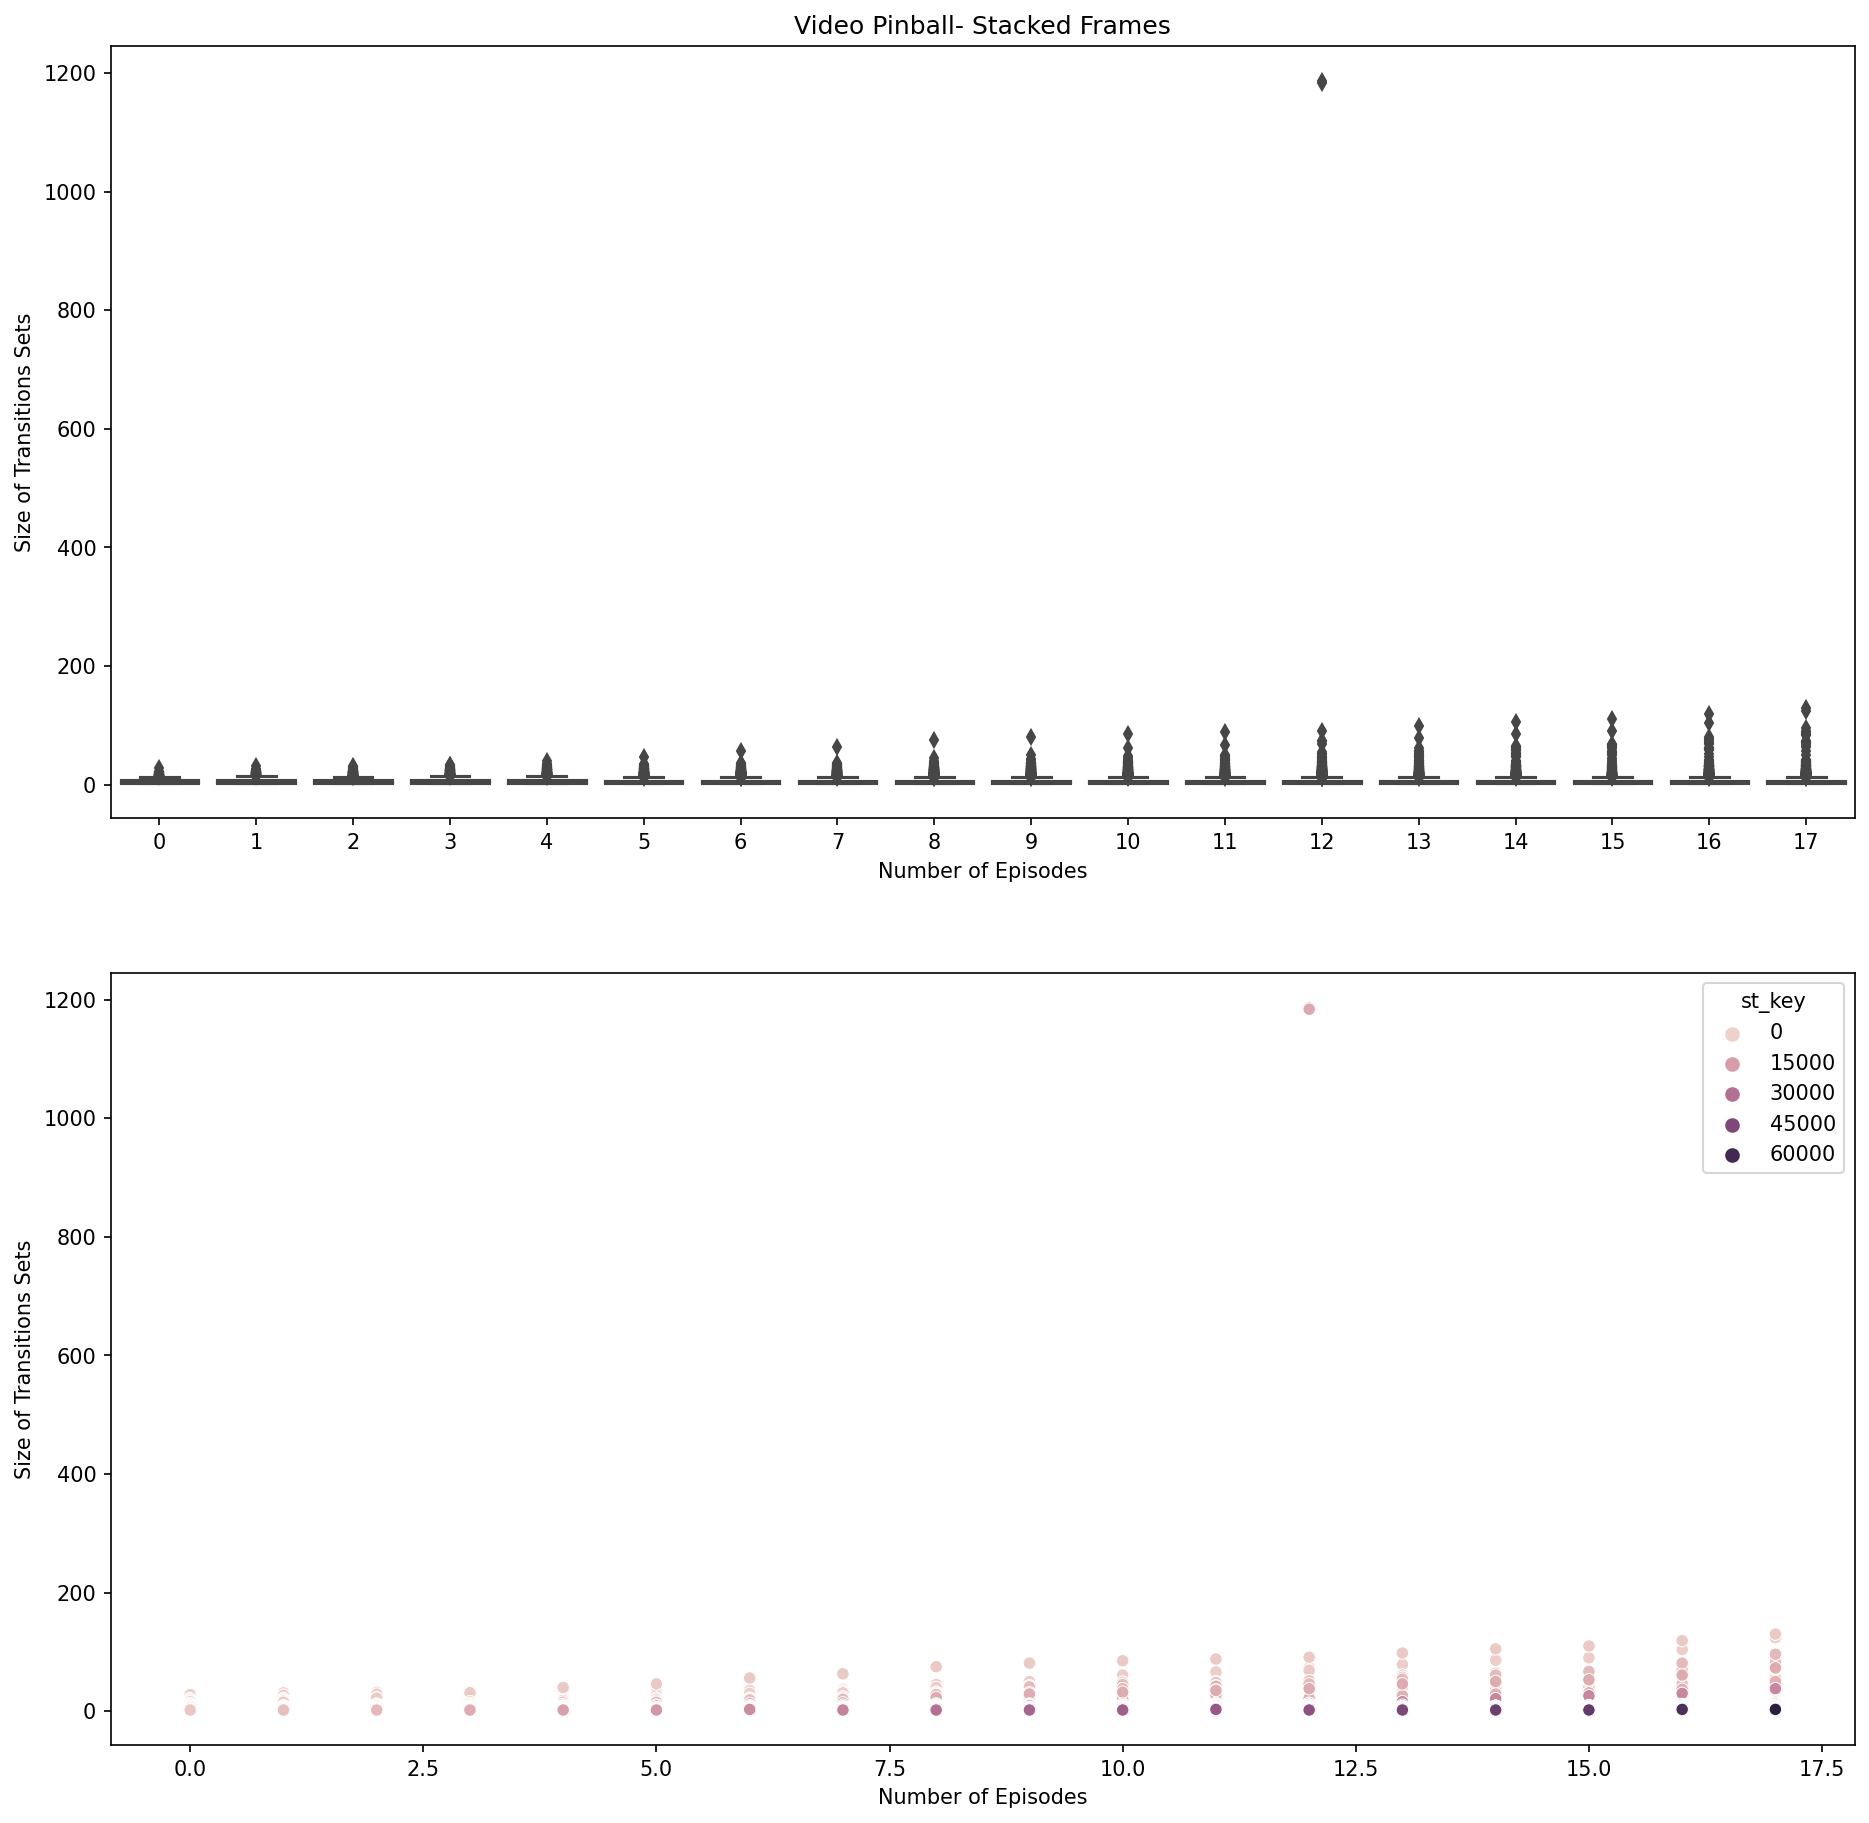

In [25]:
plotter.counts(df=df_stacked,h=15,w=15,title="Video Pinball- Stacked Frames")

## SUMMARIZING

In [5]:
df_single,df_staked = read_full_game_set()

## Distributuion of the simmilar transitions sets over the games episodes

### Single Frames

In [6]:
df_temp = pivot_max_sum(df_single,level="ep")

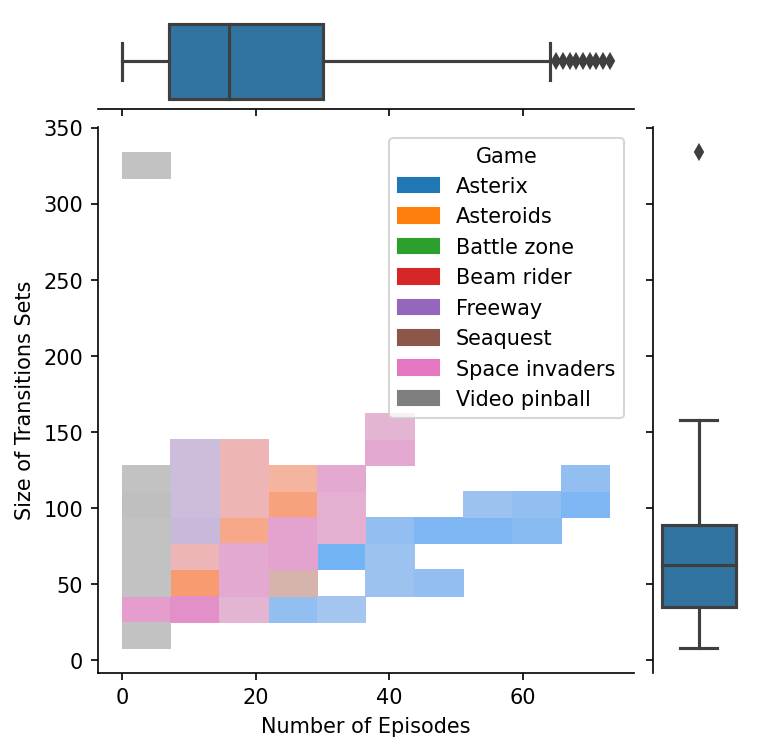

In [7]:
g = sns.JointGrid(data=df_temp.reset_index(), x="ep", y="st_count",hue="Game")
g.fig.set_figheight(5)
g.fig.set_figwidth(5)
g.fig.set_dpi(150)
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
g.set_axis_labels("Number of Episodes","Size of Transitions Sets")


<Figure size 900x600 with 0 Axes>

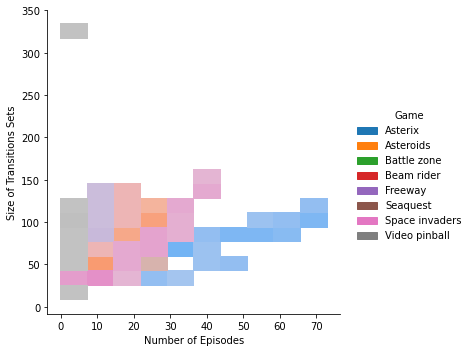

In [29]:
plotter.displot(df_temp,"")

### Staked Frames

In [8]:
#Removing outlier from Video Pinball
df_temp = df_staked.drop(df_staked[(df_staked['Game'] == "Video pinball") & (df_staked['ep'] == 12)].index)
df_temp = pivot_max_sum(df_temp,level="ep")

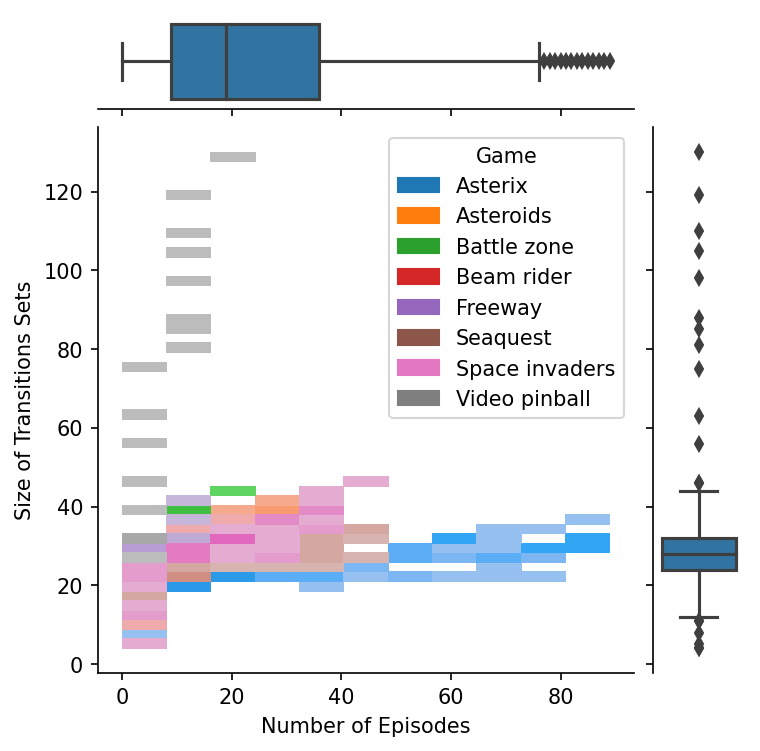

In [9]:
g = sns.JointGrid(data=df_temp.reset_index(), x="ep", y="st_count",hue="Game")
g.fig.set_figheight(5)
g.fig.set_figwidth(5)
g.fig.set_dpi(150)
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
g.set_axis_labels("Number of Episodes","Size of Transitions Sets")

## Distribution of the number of times some similar transition was found. 

### Single Frames

In [28]:
#Removing outlier from Video Pinball
df_temp = df_single.reset_index()
df_temp = df_temp.drop(df_temp[(df_temp['Game'] == "Video pinball") & (df_temp['ep'] == 7)].index)
df_temp = pivot_updates_by_stkey(df_temp)

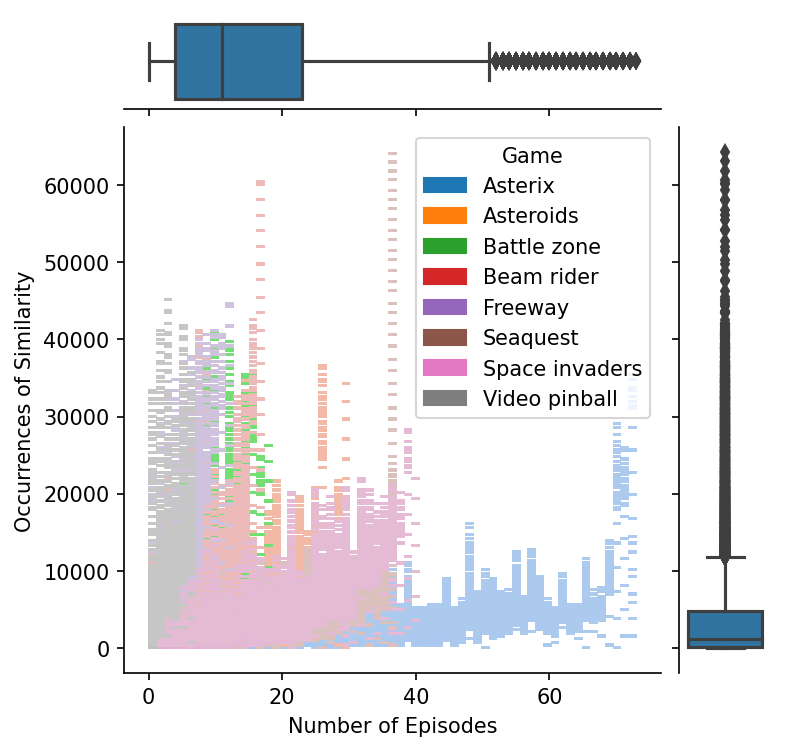

In [29]:
g = sns.JointGrid(data=df_temp.reset_index(), x="ep", y="st_count",hue="Game")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
g.set_axis_labels("Number of Episodes","Occurrences of Similarity")
g.fig.set_dpi(150)
g.fig.set_figheight(5)
g.fig.set_figwidth(5)

### Staked Frames

In [30]:
df_temp = pivot_updates_by_stkey(df_staked)

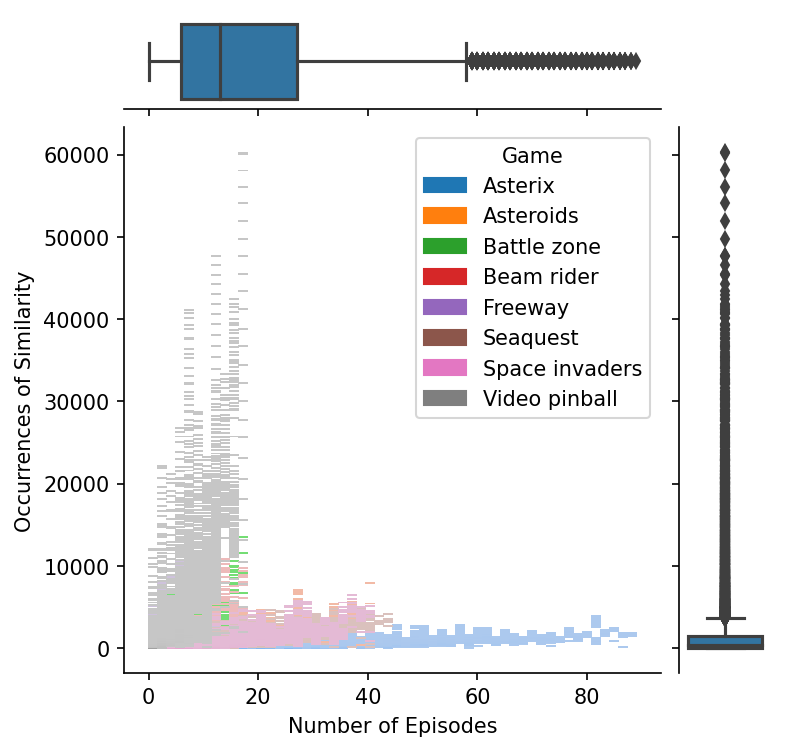

In [31]:
g = sns.JointGrid(data=df_temp.reset_index(), x="ep", y="st_count",hue="Game")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
g.set_axis_labels("Number of Episodes","Occurrences of Similarity")
g.fig.set_dpi(150)
g.fig.set_figheight(5)
g.fig.set_figwidth(5)